___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://machinelearningmastery.com/wp-content/uploads/2016/03/Compare-Machine-Learning-Algorithms.png" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2022
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___


### <font color= #2E9AFE> Tema: Comparación de modelos de regresión</font>

Una vez que aprendimos a crear los modelos de machine learning ¿qué hacemos con ellos?

Comparar varios modelos de machine learning para problemas de regresión es necesario para poder encontrar cuál de todos los modelos es el más eficiente y tiene los resultados más precisos. 

Hay muchos criterios para comparar los modelos. 

Recordando que si la **variable de respuesta es continua** entonces, este es un problema de **regresión** y tenemos que usar modelos de regresión para estimar los valores predichos. 

Como vimos, hay muchos modelos de regresión candidatos. Nuestra tarea es encontrar el que sirva a nuestro propósito.

Vamos a comparar los siguientes modelos:
- Regresión lineal múltiple
- Regresión LASSO
- Regresión Ridge
- Árbol de decisión
- Bosques Aleatorios
- SVR
- Redes Neuronales

Vamos a utilizar varias métricas para comparar los modelos.

### Métricas de Performance (Regresión)

**Error Absoluto Medio (Mean Absolute Error - MAE)**

Si $y$ es la variable de respuesta y $\hat{y}$ es la predicción, entonces el MAE es el error entre estos pares ($y$,$\hat{y}$) de variables y se calcula de la forma:

$$MAE = \frac{\sum_{i=1}^{n}|y_{i}-\hat{y}_{i}|}{n}$$

*¿Qué hace?*
- Mide el promedio del error absoluto entre los valores reales y las predicciones

*Ventajas*
- Es una métrica independiente de la escala, lo que significa que está en las mismas unidades de las variables originales. 
- Fácil de interpretar
- Es buena opción si no nos importan los valores atípicos

*Desventajas*
- Se les da la misma importancia (peso) a todos los errores
- Es insensible a valores atípicos



**Error Cuadrático Medio (Mean Square Error - MSE)**


$$MSE = \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{n}$$

*¿Qué hace?*
El MSE calcula el promedio de los cuadrados del error entre los valores verdaderos y los valores estimados

*Ventajas*
- Función diferenciable
- El efecto de errores más grandes se vuelve más pronunciado que los errores más pequeños

*Desventajas*
- Tiene diferentes unidades que los valores reales


**Diferencia entre el MAE y el MSE**

La gran diferencia es cómo responden a errores más grandes. 

Depende mucho de la decisión del negocio y el costo asociado a los errores. 
     
 **R^2**
 
 $$R^{2}=1-\frac{SS_{res}}{SS_{Tot}}= \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{\sum_{i=1}^{n}(y_{i}-\bar{y}_{i})^{2}}$$
 
 *¿Qué hace?*
- Explica la proporción de la varianza de la salida ("Y") que puede ser explicada por los predictores ("X")

*Desventajas*
- Siempre incrementa añadiendo más variables independientes (X), lo cual es una desventaja porque esas variables pueden no ser importantes para el modelo

*Ventajas*
- Es una métrica relativa que se usa para comparar varios modelos que fueron entrenados con los mismos datos

     
     
 

### Los Datos

Tenemos un dataset de personas que tienen un carro y lo quieren vender. Se tienen las siguientes variables:

- Age 
- Gender
- Miles: promedio de millas manejadas por día
- Debt
- Income
- Sales

Basados en esas variables, queremos predecir el valor potencial de venta de un carro, por lo que variable a predecir es "Sales". 

In [1]:
#Librerías

import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns 
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import SGD, Adam


In [2]:
#cargar datos
datos = pd.read_csv('carros.csv')
datos.head()

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


In [3]:
#Revisamos si hay datos nulos
missing = pd.DataFrame(datos.isnull().sum(),columns=['Valores_Nulos'])
missing

,Valores_Nulos
age,0
gender,0
miles,0
debt,0
income,0
sales,0


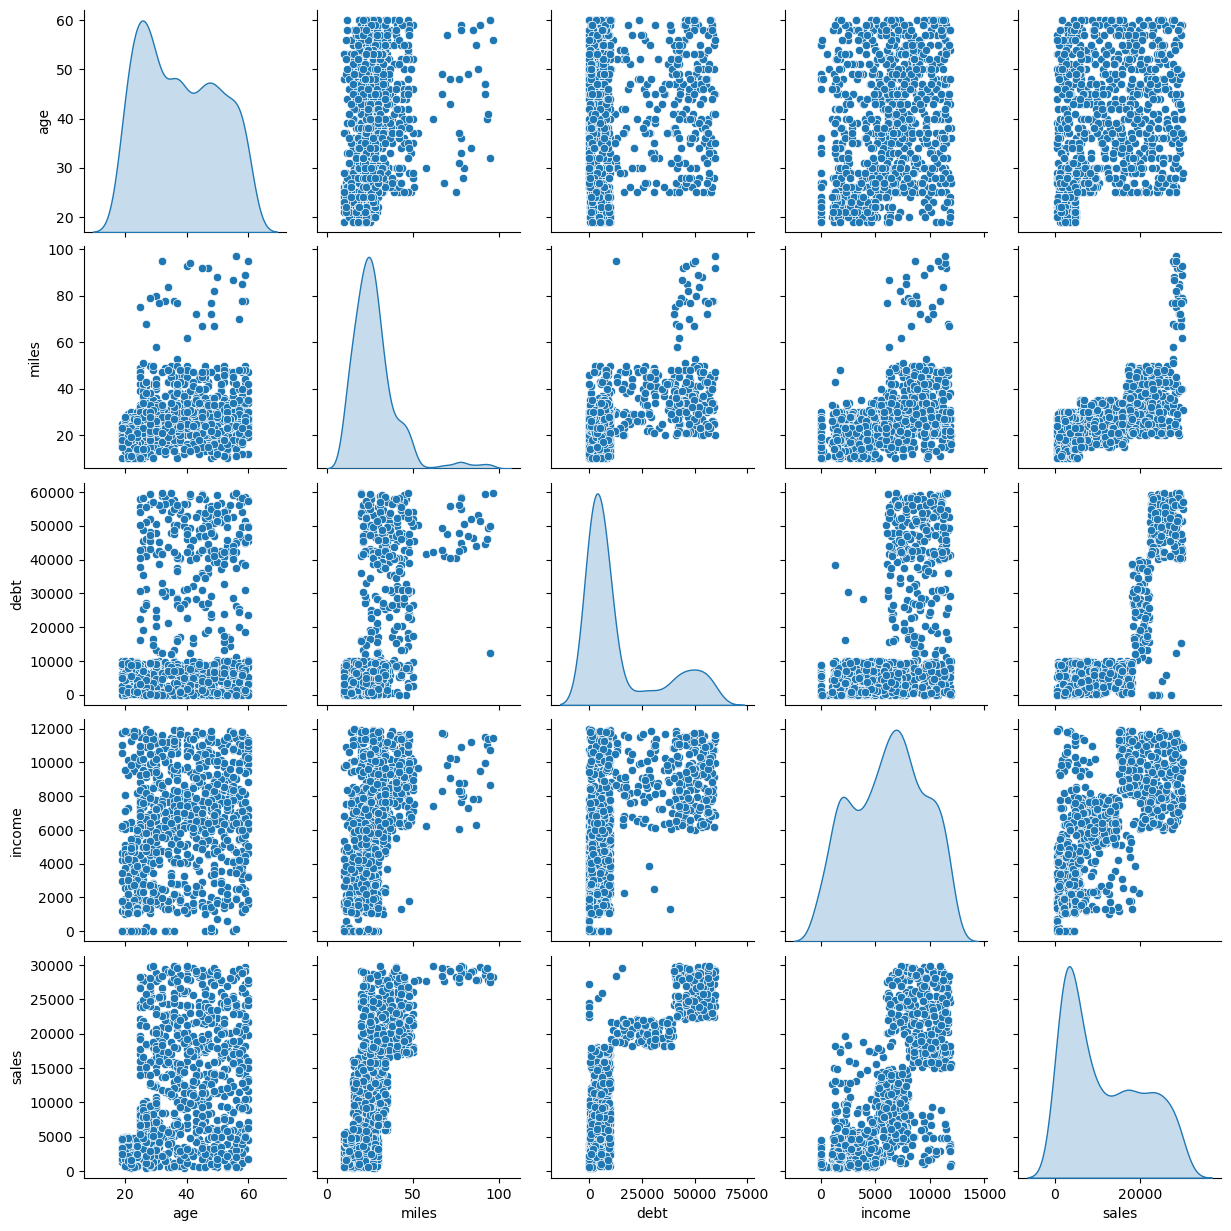

In [4]:
#Creamos gráficos básicos de los datos
sns.pairplot(datos[['age', 'miles', 'debt', 'income', 'sales']], diag_kind="kde")

In [5]:
#Calculando estadísticas básicas con los datos
datos_stats = datos.describe()
datos_stats = datos_stats.transpose()
datos_stats

,count,mean,std,min,25%,50%,75%,max
age,963.0,37.971963,12.290838,19.0,27.0,37.0,49.0,60.0
gender,963.0,0.512980,0.500091,0.0,0.0,1.0,1.0,1.0
miles,963.0,27.704050,13.378181,10.0,20.0,25.0,32.0,97.0
debt,963.0,14109.004154,18273.702481,0.0,1475.0,6236.0,16686.0,59770.0
income,963.0,6176.047767,3260.670142,0.0,3506.5,6360.0,8649.5,11970.0
sales,963.0,11689.860852,8986.896921,500.0,3554.0,9130.0,19245.0,29926.0


De las estadísticas anteriores podemos observar que algunas variables tienen grandes rangos y desviaciones, lo cual puede crear problemas durante el ajuste del modelo. Por lo tanto sería buena idea escalar los datos. 

### Train Test split

In [6]:
#separar la X y Y
X=datos.iloc[:,0:5]
y=datos.iloc[:,5]

#Dividimos los datos en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
#Estandarizar datos
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
y_train = preprocessing.scale(y_train)
X_test = preprocessing.scale(X_test)
y_test = preprocessing.scale(y_test)

**¿Porqué estandarizar los datos después del train test split?**

El escalamiento debe realizarse después de dividir los datos en entrenamiento y prueba, y se debe hacer sólo usando los datos de entrenamiento. 

Esto se debe a que los datos de prueba (test) tienen el papel de datos no vistos por el modelo, por lo que se supone que estos datos no están accesibles en la estapa del entrenamiento. 

Usar cualquier información proveniente de los datos de prueba antes o durante el entranamiento puede afectar al desempeño del modelo

#### Regresión Lineal 


In [8]:
#Inicializo objeto de regresión lineal
lin_reg = LinearRegression()
#Entrenar modelo
lin_reg.fit(X_train,y_train)
#Predecimos con datos de prueba
y_pred = lin_reg.predict(X_test)

#Métricas de performance
mae_lr=metrics.mean_absolute_error(y_test, y_pred)
mse_lr=metrics.mean_squared_error(y_test, y_pred)
r2_lr = metrics.r2_score(y_test, y_pred)

# Imprimir resultados
print('R2:  ',r2_lr)
print('MAE: ', mae_lr)
print('MSE: ', mse_lr)
print('RMSE:', np.sqrt(mse_lr))

R2:   0.8364108886819762
MAE:  0.31190078153453527
MSE:  0.1635891113180238
RMSE: 0.404461507832357


#### Regresión Lineal con selección de variables

In [9]:
#Entrenar modelo
rfe = RFE(lin_reg, n_features_to_select=4)             
rfe = rfe.fit(X_train, y_train)

#Predecimos con datos de prueba
y_pred = rfe.predict(X_test)

#Métricas de performance
mae_rfe=metrics.mean_absolute_error(y_test, y_pred)
mse_rfe=metrics.mean_squared_error(y_test, y_pred)
r2_rfe = metrics.r2_score(y_test, y_pred)

# Imprimir resultados
print('R2:  ',r2_rfe)
print('MAE: ', mae_rfe)
print('MSE: ', mse_rfe)
print('RMSE:', np.sqrt(mse_rfe))

R2:   0.8367174006172184
MAE:  0.31150993315869785
MSE:  0.16328259938278156
RMSE: 0.40408241657214133


#### Regresión Lineal con regularización Ridge


In [10]:
#Inicializo modelo de ridge con alpha = 1
ridge = Ridge(alpha=1)
#Entrenar modelo
ridge.fit(X_train,y_train)
#Predecir con datos de prueba
ridge_pred = ridge.predict(X_test)

#Métricas de performance
mae_ridge = metrics.mean_absolute_error(y_test, ridge_pred)
mse_ridge=metrics.mean_squared_error(y_test, ridge_pred)
r2_ridge = r2_score(y_test, ridge_pred)

# Imprimir resultados
print('R2:  ',r2_ridge)
print('MAE: ', mae_ridge)
print('MSE: ', mse_ridge)
print('RMSE:', np.sqrt(mse_ridge))

R2:   0.8364172531254732
MAE:  0.3119341315613785
MSE:  0.16358274687452684
RMSE: 0.4044536399570745


#### Bosques Aleatorios

In [11]:
#Inicializamos el bosque con 300 árboles
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X_train,y_train)

#Predecir el precio de venta  
y_pred = rf_regressor.predict(X_test)

#Calcular métricas
mae_rf=metrics.mean_absolute_error(y_test, y_pred)
mse_rf=metrics.mean_squared_error(y_test, y_pred)
r2_rf=metrics.r2_score(y_test, y_pred)

#Imprimir métricas
print('R2 square:',r2_rf)
print('MAE: ', mae_rf)
print('MSE: ', mse_rf)

R2 square: 0.9084579202821852
MAE:  0.21442115274283988
MSE:  0.09154207971781475


#### Máquina de Soporte Vectorial para Regresión (SVR)

In [12]:
#Inicializar objeto
regressor= SVR(kernel='rbf')
#Entrenar modelo
regressor.fit(X_train,y_train)
#Predecir
y_pred_svm=regressor.predict(X_test)

#Calcular métricas
mae_svr=metrics.mean_absolute_error(y_test, y_pred_svm)
mse_svr=metrics.mean_squared_error(y_test, y_pred_svm)
r2_svr=metrics.r2_score(y_test, y_pred_svm)

# Imprimir Métricas
print('R2 square:',r2_svr)
print('MAE: ', mae_svr)
print('MSE: ', mse_svr)

R2 square: 0.8939968531978245
MAE:  0.2368613686845287
MSE:  0.1060031468021755


#### Red Neuronal

In [13]:
import tensorflow as tf
#Hiperparámetros iniciales
epochs = 1000
learning_rate = 0.1
decay_rate = learning_rate/epochs
momentum = 0.8

# Crear arquitectura de la red neuronal
model = Sequential()
#5 variables de entrada, por lo tanto input_dim=5
model.add(Dense(12,activation='relu',input_dim=5))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='linear'))

# Configuración del optimizador
#gradiente descendente
opt = tf.keras.optimizers.legacy.SGD(lr=learning_rate,momentum=momentum,
                           decay=decay_rate,nesterov=True)
#opt = keras.optimizers.Adam(lr=0.09)
model.compile(loss = 'mean_squared_error',
              optimizer=opt,
              metrics=['mae','mse'])

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
#Ajustar modelo
history = model.fit(X_train,y_train,
                    epochs=epochs,
                    batch_size=200,
                    validation_data=(X_test,y_test))

Epoch 1/1000
4/4 [==============================] - 1s 62ms/step - loss: 1.1685 - mae: 0.8400 - mse: 1.1685 - val_loss: 0.3466 - val_mae: 0.4695 - val_mse: 0.3466
Epoch 2/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2955 - mae: 0.4241 - mse: 0.2955 - val_loss: 0.1766 - val_mae: 0.3259 - val_mse: 0.1766
Epoch 3/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1828 - mae: 0.3196 - mse: 0.1828 - val_loss: 0.1467 - val_mae: 0.3007 - val_mse: 0.1467
Epoch 4/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1626 - mae: 0.3086 - mse: 0.1626 - val_loss: 0.1322 - val_mae: 0.2881 - val_mse: 0.1322
Epoch 5/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1552 - mae: 0.2948 - mse: 0.1552 - val_loss: 0.1267 - val_mae: 0.2658 - val_mse: 0.1267
Epoch 6/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1493 - mae: 0.2819 - mse: 0.1493 - val_loss: 0.1200 - val_mae: 0.2620 - val_mse: 0.1200
Epoch 7/1000
4/4 [====

4/4 [==============================] - 0s 10ms/step - loss: 0.1362 - mae: 0.2702 - mse: 0.1362 - val_loss: 0.1268 - val_mae: 0.2611 - val_mse: 0.1268
Epoch 52/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1257 - mae: 0.2570 - mse: 0.1257 - val_loss: 0.1160 - val_mae: 0.2483 - val_mse: 0.1160
Epoch 53/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1242 - mae: 0.2526 - mse: 0.1242 - val_loss: 0.1336 - val_mae: 0.2923 - val_mse: 0.1336
Epoch 54/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1411 - mae: 0.2797 - mse: 0.1411 - val_loss: 0.1316 - val_mae: 0.2659 - val_mse: 0.1316
Epoch 55/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1292 - mae: 0.2567 - mse: 0.1292 - val_loss: 0.1160 - val_mae: 0.2595 - val_mse: 0.1160
Epoch 56/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1215 - mae: 0.2512 - mse: 0.1215 - val_loss: 0.1138 - val_mae: 0.2478 - val_mse: 0.1138
Epoch 57/1000
4/4 [===========

4/4 [==============================] - 0s 11ms/step - loss: 0.1173 - mae: 0.2502 - mse: 0.1173 - val_loss: 0.1124 - val_mae: 0.2453 - val_mse: 0.1124
Epoch 102/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1163 - mae: 0.2453 - mse: 0.1163 - val_loss: 0.1103 - val_mae: 0.2480 - val_mse: 0.1103
Epoch 103/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1165 - mae: 0.2510 - mse: 0.1165 - val_loss: 0.1693 - val_mae: 0.3195 - val_mse: 0.1693
Epoch 104/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1495 - mae: 0.2912 - mse: 0.1495 - val_loss: 0.1218 - val_mae: 0.2547 - val_mse: 0.1218
Epoch 105/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1292 - mae: 0.2639 - mse: 0.1292 - val_loss: 0.1251 - val_mae: 0.2569 - val_mse: 0.1251
Epoch 106/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1172 - mae: 0.2441 - mse: 0.1172 - val_loss: 0.1214 - val_mae: 0.2760 - val_mse: 0.1214
Epoch 107/1000
4/4 [=====

Epoch 151/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1143 - mae: 0.2476 - mse: 0.1143 - val_loss: 0.1134 - val_mae: 0.2525 - val_mse: 0.1134
Epoch 152/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1121 - mae: 0.2446 - mse: 0.1121 - val_loss: 0.1182 - val_mae: 0.2503 - val_mse: 0.1182
Epoch 153/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1158 - mae: 0.2486 - mse: 0.1158 - val_loss: 0.1445 - val_mae: 0.2826 - val_mse: 0.1445
Epoch 154/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1297 - mae: 0.2691 - mse: 0.1297 - val_loss: 0.1163 - val_mae: 0.2498 - val_mse: 0.1163
Epoch 155/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1157 - mae: 0.2466 - mse: 0.1157 - val_loss: 0.1657 - val_mae: 0.3380 - val_mse: 0.1657
Epoch 156/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1475 - mae: 0.2975 - mse: 0.1475 - val_loss: 0.1167 - val_mae: 0.2504 - val_mse: 0.1167
Epoch 157/

Epoch 201/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1181 - mae: 0.2524 - mse: 0.1181 - val_loss: 0.1183 - val_mae: 0.2511 - val_mse: 0.1183
Epoch 202/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1099 - mae: 0.2403 - mse: 0.1099 - val_loss: 0.1395 - val_mae: 0.2813 - val_mse: 0.1395
Epoch 203/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1239 - mae: 0.2647 - mse: 0.1239 - val_loss: 0.1136 - val_mae: 0.2482 - val_mse: 0.1136
Epoch 204/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1101 - mae: 0.2428 - mse: 0.1101 - val_loss: 0.1140 - val_mae: 0.2502 - val_mse: 0.1140
Epoch 205/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1141 - mae: 0.2486 - mse: 0.1141 - val_loss: 0.1276 - val_mae: 0.2631 - val_mse: 0.1276
Epoch 206/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1172 - mae: 0.2511 - mse: 0.1172 - val_loss: 0.1210 - val_mae: 0.2733 - val_mse: 0.1210
Epoch 207/

Epoch 251/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1044 - mae: 0.2320 - mse: 0.1044 - val_loss: 0.1220 - val_mae: 0.2532 - val_mse: 0.1220
Epoch 252/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1086 - mae: 0.2389 - mse: 0.1086 - val_loss: 0.1340 - val_mae: 0.2837 - val_mse: 0.1340
Epoch 253/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1101 - mae: 0.2455 - mse: 0.1101 - val_loss: 0.1170 - val_mae: 0.2549 - val_mse: 0.1170
Epoch 254/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1061 - mae: 0.2365 - mse: 0.1061 - val_loss: 0.1157 - val_mae: 0.2543 - val_mse: 0.1157
Epoch 255/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1078 - mae: 0.2385 - mse: 0.1078 - val_loss: 0.1122 - val_mae: 0.2489 - val_mse: 0.1122
Epoch 256/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1047 - mae: 0.2329 - mse: 0.1047 - val_loss: 0.1336 - val_mae: 0.2897 - val_mse: 0.1336
Epoch 257/

Epoch 301/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1043 - mae: 0.2341 - mse: 0.1043 - val_loss: 0.1294 - val_mae: 0.2606 - val_mse: 0.1294
Epoch 302/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1067 - mae: 0.2358 - mse: 0.1067 - val_loss: 0.1233 - val_mae: 0.2558 - val_mse: 0.1233
Epoch 303/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1048 - mae: 0.2362 - mse: 0.1048 - val_loss: 0.1173 - val_mae: 0.2498 - val_mse: 0.1173
Epoch 304/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1014 - mae: 0.2303 - mse: 0.1014 - val_loss: 0.1195 - val_mae: 0.2520 - val_mse: 0.1195
Epoch 305/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1025 - mae: 0.2320 - mse: 0.1025 - val_loss: 0.1172 - val_mae: 0.2493 - val_mse: 0.1172
Epoch 306/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1025 - mae: 0.2312 - mse: 0.1025 - val_loss: 0.1198 - val_mae: 0.2541 - val_mse: 0.1198
Epoch 307/

Epoch 351/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1017 - mae: 0.2318 - mse: 0.1017 - val_loss: 0.1219 - val_mae: 0.2568 - val_mse: 0.1219
Epoch 352/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1017 - mae: 0.2324 - mse: 0.1017 - val_loss: 0.1197 - val_mae: 0.2587 - val_mse: 0.1197
Epoch 353/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1053 - mae: 0.2367 - mse: 0.1053 - val_loss: 0.1521 - val_mae: 0.2866 - val_mse: 0.1521
Epoch 354/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1104 - mae: 0.2429 - mse: 0.1104 - val_loss: 0.1182 - val_mae: 0.2532 - val_mse: 0.1182
Epoch 355/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1027 - mae: 0.2336 - mse: 0.1027 - val_loss: 0.1190 - val_mae: 0.2578 - val_mse: 0.1190
Epoch 356/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1014 - mae: 0.2319 - mse: 0.1014 - val_loss: 0.1156 - val_mae: 0.2505 - val_mse: 0.1156
Epoch 357/

Epoch 401/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1083 - mae: 0.2398 - mse: 0.1083 - val_loss: 0.1182 - val_mae: 0.2563 - val_mse: 0.1182
Epoch 402/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1021 - mae: 0.2318 - mse: 0.1021 - val_loss: 0.1225 - val_mae: 0.2550 - val_mse: 0.1225
Epoch 403/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1020 - mae: 0.2310 - mse: 0.1020 - val_loss: 0.1265 - val_mae: 0.2593 - val_mse: 0.1265
Epoch 404/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1029 - mae: 0.2361 - mse: 0.1029 - val_loss: 0.1238 - val_mae: 0.2570 - val_mse: 0.1238
Epoch 405/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1039 - mae: 0.2356 - mse: 0.1039 - val_loss: 0.1189 - val_mae: 0.2640 - val_mse: 0.1189
Epoch 406/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1019 - mae: 0.2331 - mse: 0.1019 - val_loss: 0.1208 - val_mae: 0.2534 - val_mse: 0.1208
Epoch 407/

Epoch 451/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1037 - mae: 0.2351 - mse: 0.1037 - val_loss: 0.1327 - val_mae: 0.2797 - val_mse: 0.1327
Epoch 452/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1000 - mae: 0.2308 - mse: 0.1000 - val_loss: 0.1196 - val_mae: 0.2582 - val_mse: 0.1196
Epoch 453/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0997 - mae: 0.2312 - mse: 0.0997 - val_loss: 0.1229 - val_mae: 0.2619 - val_mse: 0.1229
Epoch 454/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1033 - mae: 0.2348 - mse: 0.1033 - val_loss: 0.1272 - val_mae: 0.2759 - val_mse: 0.1272
Epoch 455/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1017 - mae: 0.2342 - mse: 0.1017 - val_loss: 0.1216 - val_mae: 0.2589 - val_mse: 0.1216
Epoch 456/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0978 - mae: 0.2307 - mse: 0.0978 - val_loss: 0.1230 - val_mae: 0.2585 - val_mse: 0.1230
Epoch 457/

Epoch 501/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1016 - mae: 0.2370 - mse: 0.1016 - val_loss: 0.1224 - val_mae: 0.2571 - val_mse: 0.1224
Epoch 502/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1018 - mae: 0.2336 - mse: 0.1018 - val_loss: 0.1221 - val_mae: 0.2532 - val_mse: 0.1221
Epoch 503/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0975 - mae: 0.2255 - mse: 0.0975 - val_loss: 0.1184 - val_mae: 0.2527 - val_mse: 0.1184
Epoch 504/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0976 - mae: 0.2256 - mse: 0.0976 - val_loss: 0.1252 - val_mae: 0.2567 - val_mse: 0.1252
Epoch 505/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1021 - mae: 0.2323 - mse: 0.1021 - val_loss: 0.1223 - val_mae: 0.2537 - val_mse: 0.1223
Epoch 506/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0975 - mae: 0.2258 - mse: 0.0975 - val_loss: 0.1227 - val_mae: 0.2556 - val_mse: 0.1227
Epoch 507/

Epoch 551/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0979 - mae: 0.2308 - mse: 0.0979 - val_loss: 0.1195 - val_mae: 0.2549 - val_mse: 0.1195
Epoch 552/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0961 - mae: 0.2254 - mse: 0.0961 - val_loss: 0.1274 - val_mae: 0.2765 - val_mse: 0.1274
Epoch 553/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1003 - mae: 0.2362 - mse: 0.1003 - val_loss: 0.1290 - val_mae: 0.2607 - val_mse: 0.1290
Epoch 554/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0970 - mae: 0.2239 - mse: 0.0970 - val_loss: 0.1235 - val_mae: 0.2700 - val_mse: 0.1235
Epoch 555/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1003 - mae: 0.2338 - mse: 0.1003 - val_loss: 0.1240 - val_mae: 0.2638 - val_mse: 0.1240
Epoch 556/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1006 - mae: 0.2314 - mse: 0.1006 - val_loss: 0.1209 - val_mae: 0.2577 - val_mse: 0.1209
Epoch 557/

Epoch 601/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1003 - mae: 0.2342 - mse: 0.1003 - val_loss: 0.1384 - val_mae: 0.2725 - val_mse: 0.1384
Epoch 602/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1060 - mae: 0.2407 - mse: 0.1060 - val_loss: 0.1414 - val_mae: 0.2741 - val_mse: 0.1414
Epoch 603/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1005 - mae: 0.2323 - mse: 0.1005 - val_loss: 0.1224 - val_mae: 0.2644 - val_mse: 0.1224
Epoch 604/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0962 - mae: 0.2270 - mse: 0.0962 - val_loss: 0.1204 - val_mae: 0.2576 - val_mse: 0.1204
Epoch 605/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1011 - mae: 0.2325 - mse: 0.1011 - val_loss: 0.1375 - val_mae: 0.2713 - val_mse: 0.1375
Epoch 606/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1006 - mae: 0.2305 - mse: 0.1006 - val_loss: 0.1184 - val_mae: 0.2537 - val_mse: 0.1184
Epoch 607/

Epoch 651/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0940 - mae: 0.2229 - mse: 0.0940 - val_loss: 0.1219 - val_mae: 0.2600 - val_mse: 0.1219
Epoch 652/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0941 - mae: 0.2236 - mse: 0.0941 - val_loss: 0.1232 - val_mae: 0.2610 - val_mse: 0.1232
Epoch 653/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0941 - mae: 0.2233 - mse: 0.0941 - val_loss: 0.1415 - val_mae: 0.2759 - val_mse: 0.1415
Epoch 654/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0993 - mae: 0.2347 - mse: 0.0993 - val_loss: 0.1180 - val_mae: 0.2568 - val_mse: 0.1180
Epoch 655/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0947 - mae: 0.2252 - mse: 0.0947 - val_loss: 0.1272 - val_mae: 0.2600 - val_mse: 0.1272
Epoch 656/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0968 - mae: 0.2258 - mse: 0.0968 - val_loss: 0.1380 - val_mae: 0.2972 - val_mse: 0.1380
Epoch 657/

Epoch 701/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0949 - mae: 0.2220 - mse: 0.0949 - val_loss: 0.1239 - val_mae: 0.2618 - val_mse: 0.1239
Epoch 702/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0968 - mae: 0.2298 - mse: 0.0968 - val_loss: 0.1290 - val_mae: 0.2707 - val_mse: 0.1290
Epoch 703/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0961 - mae: 0.2275 - mse: 0.0961 - val_loss: 0.1274 - val_mae: 0.2602 - val_mse: 0.1274
Epoch 704/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0938 - mae: 0.2219 - mse: 0.0938 - val_loss: 0.1227 - val_mae: 0.2616 - val_mse: 0.1227
Epoch 705/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0944 - mae: 0.2233 - mse: 0.0944 - val_loss: 0.1290 - val_mae: 0.2605 - val_mse: 0.1290
Epoch 706/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1039 - mae: 0.2350 - mse: 0.1039 - val_loss: 0.1277 - val_mae: 0.2612 - val_mse: 0.1277
Epoch 707/

Epoch 751/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0954 - mae: 0.2281 - mse: 0.0954 - val_loss: 0.1350 - val_mae: 0.2918 - val_mse: 0.1350
Epoch 752/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0968 - mae: 0.2321 - mse: 0.0968 - val_loss: 0.1227 - val_mae: 0.2583 - val_mse: 0.1227
Epoch 753/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0931 - mae: 0.2231 - mse: 0.0931 - val_loss: 0.1265 - val_mae: 0.2608 - val_mse: 0.1265
Epoch 754/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0941 - mae: 0.2255 - mse: 0.0941 - val_loss: 0.1274 - val_mae: 0.2622 - val_mse: 0.1274
Epoch 755/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0983 - mae: 0.2307 - mse: 0.0983 - val_loss: 0.1304 - val_mae: 0.2617 - val_mse: 0.1304
Epoch 756/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0967 - mae: 0.2296 - mse: 0.0967 - val_loss: 0.1411 - val_mae: 0.2762 - val_mse: 0.1411
Epoch 757/

Epoch 801/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0980 - mae: 0.2306 - mse: 0.0980 - val_loss: 0.1268 - val_mae: 0.2691 - val_mse: 0.1268
Epoch 802/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0940 - mae: 0.2272 - mse: 0.0940 - val_loss: 0.1259 - val_mae: 0.2604 - val_mse: 0.1259
Epoch 803/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0924 - mae: 0.2208 - mse: 0.0924 - val_loss: 0.1319 - val_mae: 0.2773 - val_mse: 0.1319
Epoch 804/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0948 - mae: 0.2293 - mse: 0.0948 - val_loss: 0.1448 - val_mae: 0.3028 - val_mse: 0.1448
Epoch 805/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0982 - mae: 0.2367 - mse: 0.0982 - val_loss: 0.1298 - val_mae: 0.2711 - val_mse: 0.1298
Epoch 806/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0940 - mae: 0.2276 - mse: 0.0940 - val_loss: 0.1355 - val_mae: 0.2666 - val_mse: 0.1355
Epoch 807/

Epoch 851/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0943 - mae: 0.2238 - mse: 0.0943 - val_loss: 0.1545 - val_mae: 0.2944 - val_mse: 0.1545
Epoch 852/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1012 - mae: 0.2351 - mse: 0.1012 - val_loss: 0.1345 - val_mae: 0.2670 - val_mse: 0.1345
Epoch 853/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1030 - mae: 0.2386 - mse: 0.1030 - val_loss: 0.1271 - val_mae: 0.2575 - val_mse: 0.1271
Epoch 854/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0939 - mae: 0.2224 - mse: 0.0939 - val_loss: 0.1248 - val_mae: 0.2589 - val_mse: 0.1248
Epoch 855/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0916 - mae: 0.2194 - mse: 0.0916 - val_loss: 0.1501 - val_mae: 0.3114 - val_mse: 0.1501
Epoch 856/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0997 - mae: 0.2377 - mse: 0.0997 - val_loss: 0.1242 - val_mae: 0.2600 - val_mse: 0.1242
Epoch 857/

Epoch 901/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0953 - mae: 0.2263 - mse: 0.0953 - val_loss: 0.1215 - val_mae: 0.2540 - val_mse: 0.1215
Epoch 902/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0898 - mae: 0.2182 - mse: 0.0898 - val_loss: 0.1256 - val_mae: 0.2675 - val_mse: 0.1256
Epoch 903/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0929 - mae: 0.2270 - mse: 0.0929 - val_loss: 0.1330 - val_mae: 0.2646 - val_mse: 0.1330
Epoch 904/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0907 - mae: 0.2210 - mse: 0.0907 - val_loss: 0.1285 - val_mae: 0.2635 - val_mse: 0.1285
Epoch 905/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0908 - mae: 0.2207 - mse: 0.0908 - val_loss: 0.1273 - val_mae: 0.2646 - val_mse: 0.1273
Epoch 906/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0909 - mae: 0.2225 - mse: 0.0909 - val_loss: 0.1274 - val_mae: 0.2603 - val_mse: 0.1274
Epoch 907/

Epoch 951/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0888 - mae: 0.2174 - mse: 0.0888 - val_loss: 0.1273 - val_mae: 0.2602 - val_mse: 0.1273
Epoch 952/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0954 - mae: 0.2299 - mse: 0.0954 - val_loss: 0.1265 - val_mae: 0.2595 - val_mse: 0.1265
Epoch 953/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0902 - mae: 0.2197 - mse: 0.0902 - val_loss: 0.1253 - val_mae: 0.2583 - val_mse: 0.1253
Epoch 954/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0899 - mae: 0.2210 - mse: 0.0899 - val_loss: 0.1250 - val_mae: 0.2639 - val_mse: 0.1250
Epoch 955/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0894 - mae: 0.2184 - mse: 0.0894 - val_loss: 0.1258 - val_mae: 0.2590 - val_mse: 0.1258
Epoch 956/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0891 - mae: 0.2178 - mse: 0.0891 - val_loss: 0.1385 - val_mae: 0.2729 - val_mse: 0.1385
Epoch 957/

In [15]:
#Graficar el MAE
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['mae']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_mae']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MAE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [16]:
#Graficar el MSE
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

Con los gráficos de arriba podemos observar que tanto las métricas de train y de validación disminuyen exponencialmentes con el incremento del número de épocas. 

10/10 [==============================] - 0s 778us/step


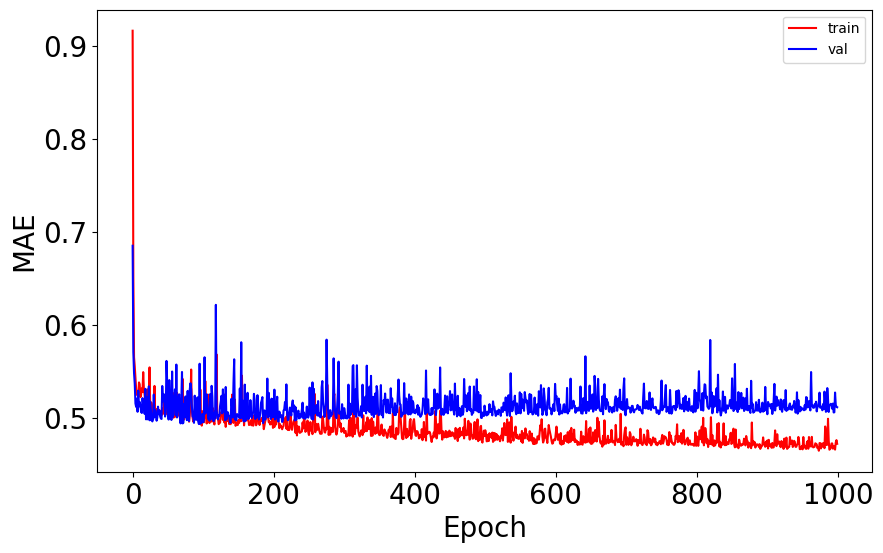

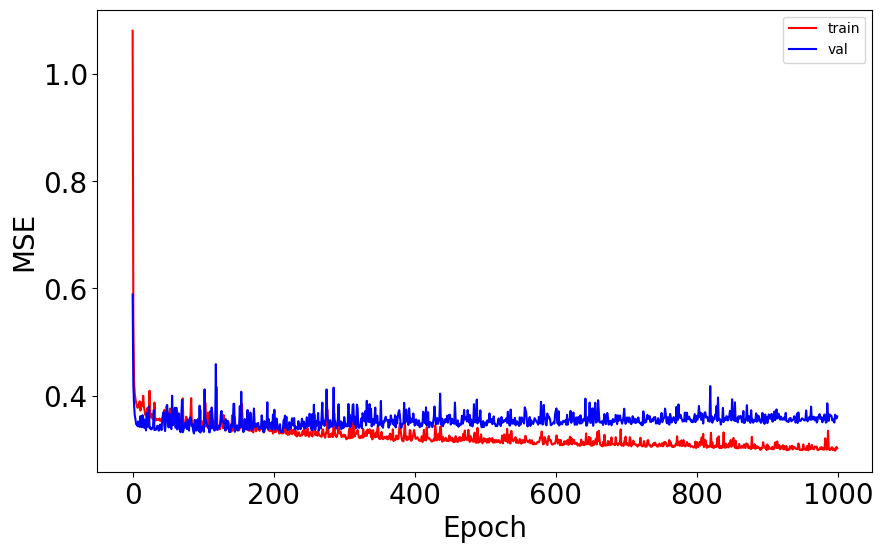

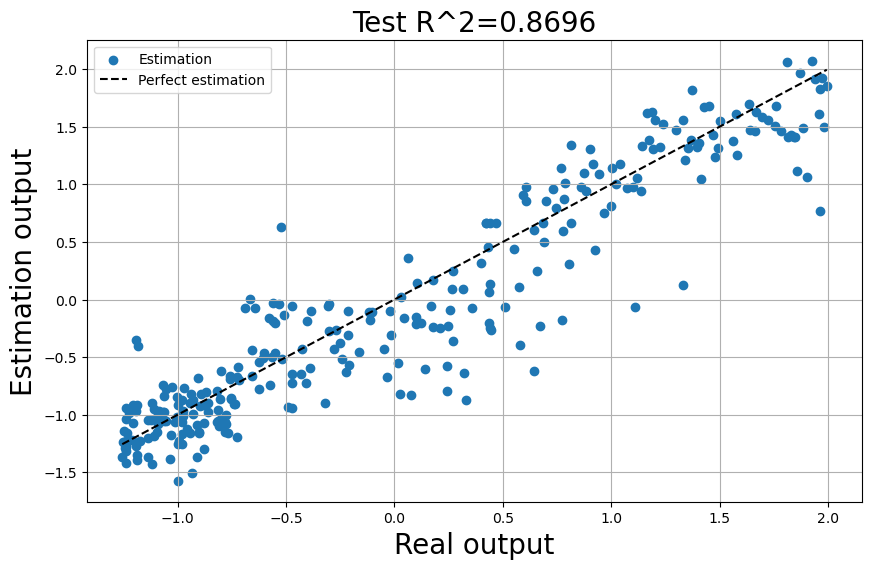

In [17]:
#Predecir
yhat = model.predict(X_test)

#Calcular R2
R2_score = r2_score(y_test,yhat)

#Graficar la R2
xmin,xmax = min(y_test),max(y_test)
xline = np.linspace(xmin,xmax)
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,yhat,label='Estimation')
plt.plot(xline,xline,'k--',label='Perfect estimation')
plt.xlabel('Real output', fontsize=20)
plt.ylabel('Estimation output', fontsize=20)
plt.title('Test R^2=%0.4f'%R2_score, fontsize=20)
plt.legend()
plt.grid()
plt.show()

In [18]:
#Calcular métricas
mae_nn=metrics.mean_absolute_error(y_test, yhat)
mse_nn=metrics.mean_squared_error(y_test, yhat)
r2_nn=metrics.r2_score(y_test, yhat)

# imprimir Métricas
print('R2 square:',r2_nn)
print('MAE: ', mae_nn)
print('MSE: ', mse_nn)

R2 square: 0.8696284261326674
MAE:  0.2616082007535149
MSE:  0.1303715738673326


#### Resultados con train test split

In [19]:
data_compar_train_test = {'Modelo': ['LR', 'LR RFE', 'Ridge', 'RF', ' SVR', 'NN'], 'R2': [r2_lr, r2_rfe, r2_ridge, r2_rf, r2_svr, r2_nn], 'MSE': [mse_lr, mse_rfe, mse_ridge, mse_rf, mse_svr, mse_nn], 'MAE': [mae_lr, mae_rfe, mae_ridge,mae_rf,mae_svr, mae_nn]} 
data_compar_train_test = pd.DataFrame(data_compar_train_test)
data_compar_train_test

,Modelo,R2,MSE,MAE
0,LR,0.836411,0.163589,0.311901
1,LR RFE,0.836717,0.163283,0.311510
2,Ridge,0.836417,0.163583,0.311934
3,RF,0.908458,0.091542,0.214421
4,SVR,0.893997,0.106003,0.236861
5,NN,0.869628,0.130372,0.261608


### Cross Validation con optimización de hiperparámetros

La idea es dividir los datos en train y test, entrenar múltiples modelos muestreando los datos de entrenamiento. 
Finalmente probar el modelo en el test set



<img style="float: center; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/700/1*4G__SV580CxFj78o9yUXuQ.png" width="450px" height="280px" />


In [20]:
#Configurar los folds que vamos a usar para todos los modelos
n_folds = 5
seed = 7
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)

#### Regresión Lineal

In [21]:
#Inicializar modelo
lm=LinearRegression()

#Hacer el cross validation y probar con el train
r2_lr= (cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_lr= -(cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_lr= (-cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_lr)
print("MAE Train", mae_lr)
print("MSE Train", mse_lr)

R2 train 0.8158013380172221
MAE Train 0.3258039481837593
MSE Train 0.18158541560608504


In [22]:
#Performance en el test
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

mae_lr=metrics.mean_absolute_error(y_test,y_pred)
mse_lr=metrics.mean_squared_error(y_test,y_pred)
r2_lr=metrics.r2_score(y_test,y_pred)

results_lr = pd.DataFrame([['Linear regression', mae_lr,mse_lr,r2_lr]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_lr


,Model,MAE,MSE,R2
0,Linear regression,0.311901,0.163589,0.836411


#### Regresión lineal con selección de variables (RFE)

In [23]:
# Hacer el grid search
#Especificar el modelo
lm = LinearRegression()
#Ajustar datos
lm.fit(X_train, y_train)
#Inicializar modelo de Recursive Feature Elimination para selección de variables
rfe = RFE(lm)             

#Especificar rango de hiperparámetros a tunear
hyper_params = [{'n_features_to_select': list(range(1, np.shape(X_train)[1]+1))}]

# Crear el grid search
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = kfold, 
                        verbose = 1,
                        return_train_score=True)      


#Performance en el test
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)

mae_rfe=metrics.mean_absolute_error(y_test,y_pred)
mse_rfe=metrics.mean_squared_error(y_test,y_pred)
r2_rfe=metrics.r2_score(y_test,y_pred)

results_rfe = pd.DataFrame([['Linear regression RFE', mae_rfe,mse_rfe,r2_rfe]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_rfe

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,Model,MAE,MSE,R2
0,Linear regression RFE,0.31151,0.163283,0.836717


#### Rigde

In [24]:
from sklearn.linear_model import RidgeCV
#Inicializar modelo de Ridge con cross validation para seleccionar el hiperparámetro de alpha óptimo
model = RidgeCV(alphas=np.arange(0.01,5,0.01), cv=kfold, scoring='neg_mean_squared_error') 
#Entreno modelo
model.fit(X_train, y_train)

#Alfa óptima
print('alfa: %f' % model.alpha_)

#Performance en el test
y_pred = model.predict(X_test)

mae_ridge=metrics.mean_absolute_error(y_test,y_pred)
mse_ridge=metrics.mean_squared_error(y_test,y_pred)
r2_ridge=metrics.r2_score(y_test,y_pred)

results_ridge = pd.DataFrame([['Linear regression Ridge', mae_ridge,mse_ridge,r2_ridge]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_ridge

alfa: 4.240000


,Model,MAE,MSE,R2
0,Linear regression Ridge,0.312042,0.163572,0.836428


#### Random Forest



In [25]:
from sklearn.ensemble import RandomForestRegressor

#Usando cross validation y grid search
from sklearn.model_selection import GridSearchCV
#Inicializo modelo
model = RandomForestRegressor(min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
#Grid search para optimizar hiperparámetros
gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11), #profundidad del árbol
                                'min_samples_split': range(10, 60, 10),
                                'n_estimators': [100, 300, 500, 800], #número de árboles
                                'criterion': ['mse']}, 
                  cv=kfold,
                  scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

print(gs.best_params_)

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

{'criterion': 'mse', 'max_depth': 8, 'min_samples_split': 30, 'n_estimators': 800}


In [26]:
#crear modelo usando parámetros óptimos
new_model_RF = RandomForestRegressor(n_estimators=800,
                               criterion='mse',
                               max_depth=8,
                               min_samples_split=30,
                               min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
#Entreno modelo optimizado
new_model_RF.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_rf= (cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_rf= -(cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_rf= (-cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_rf)
print("MAE Train", mae_rf)
print("MSE Train", mse_rf)

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

R2 train 0.8920603214443167
MAE Train 0.21984381446970488
MSE Train 0.10667653653789569


In [27]:
#Performance en el test
y_pred = new_model_RF.predict(X_test)

mae_rf=metrics.mean_absolute_error(y_test,y_pred)
mse_rf=metrics.mean_squared_error(y_test,y_pred)
r2_rf=metrics.r2_score(y_test,y_pred)

results_rf = pd.DataFrame([['Random Forest', mae_rf,mse_rf,r2_rf]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_rf

,Model,MAE,MSE,R2
0,Random Forest,0.208829,0.085517,0.914483


#### Árbol de decisión

In [28]:
#Usando cross validation y grid search
tree = DecisionTreeRegressor()

#Grid search para optimizar hiperparámetros
gs = GridSearchCV(tree,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=kfold,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'max_depth': 7, 'min_samples_split': 50}


In [29]:
#crear modelo usando parámetros óptimos
new_model_tree = DecisionTreeRegressor(max_depth=7,
                                  min_samples_split=50)

#Entreno modelo optimizado
new_model_tree.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_tree= (cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_tree= -(cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_tree= (-cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_tree)
print("MAE Train", mae_tree)
print("MSE Train", mse_tree)

R2 train 0.8833332245009938
MAE Train 0.22517186175054055
MSE Train 0.11514499443663606


In [30]:
#Performance en el test
y_pred = new_model_tree.predict(X_test)

mae_tree=metrics.mean_absolute_error(y_test,y_pred)
mse_tree=metrics.mean_squared_error(y_test,y_pred)
r2_tree=metrics.r2_score(y_test,y_pred)

results_tree = pd.DataFrame([['Decision Tree', mae_tree,mse_tree,r2_tree]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_tree 

,Model,MAE,MSE,R2
0,Decision Tree,0.2231,0.108104,0.891896


#### Máquina de vector soporte (SVR)

In [31]:
#proponer malla para el gridsearch
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

model = SVR()

gs = GridSearchCV(model,
                  tuned_parameters, 
                  cv=kfold,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [32]:
#crear modelo usando parámetros óptimos
new_model_svr = SVR(kernel='rbf', C=1000, gamma=0.001)

#Entreno modelo optimizado
new_model_svr.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_svr= (cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_svr= -(cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_svr= (-cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_svr)
print("MAE Train", mae_svr)
print("MSE Train", mse_svr)

R2 train 0.8833332245009938
MAE Train 0.22517186175054055
MSE Train 0.11514499443663609


In [33]:
#Performance en el test
y_pred = new_model_svr.predict(X_test)

mae_svr=metrics.mean_absolute_error(y_test,y_pred)
mse_svr=metrics.mean_squared_error(y_test,y_pred)
r2_svr=metrics.r2_score(y_test,y_pred)

results_svr = pd.DataFrame([['SVR', mae_svr,mse_svr,r2_svr]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_svr 

,Model,MAE,MSE,R2
0,SVR,0.257272,0.118553,0.881447


#### Red Neuronal

In [34]:
def create_model(lr=0.1,momentum=0.8):
    # Neural network architecture
    model = Sequential()
    model.add(Dense(12,activation='relu',input_dim=5))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='linear'))
    # Optimizer configuration
    opt = tf.keras.optimizers.legacy.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100

model_search = KerasRegressor(build_fn=create_model,epochs=epochs)

# Definir los parámetros del grid search
lr = [0.1, 0.05, 0.01]
momentum = [0.8, 0.6, 0.4]
param_grid = dict(lr=lr,momentum=momentum)

selection_score = make_scorer(mean_squared_error,greater_is_better=False) #MSE

grid = GridSearchCV(estimator=model_search, param_grid=param_grid,
                    cv=kfold,return_train_score=True,
                    scoring=selection_score)

grid_result = grid.fit(X_train, y_train)

print('Mejores parámetros:')
print(grid_result.best_params_)


Epoch 1/200


C:\Users\Ricardo\AppData\Local\Temp\ipykernel_1352\2667650203.py:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_search = KerasRegressor(build_fn=create_model,epochs=epochs)
C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.4246 - mse: 0.4246
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1999 - mse: 0.1999
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1773 - mse: 0.1773
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2032 - mse: 0.2032
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1600 - mse: 0.1600
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1567 - mse: 0.1567
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1596 - mse: 0.1596
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1525 - mse: 0.1525
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1500 - mse: 0.1500
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1505 - mse: 0.1505
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - l

17/17 [==============================] - 0s 876us/step - loss: 0.1157 - mse: 0.1157
Epoch 87/200
17/17 [==============================] - 0s 938us/step - loss: 0.1171 - mse: 0.1171
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1125 - mse: 0.1125
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1219 - mse: 0.1219
Epoch 90/200
17/17 [==============================] - 0s 939us/step - loss: 0.1163 - mse: 0.1163
Epoch 91/200
17/17 [==============================] - 0s 939us/step - loss: 0.1251 - mse: 0.1251
Epoch 92/200
17/17 [==============================] - 0s 876us/step - loss: 0.1246 - mse: 0.1246
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1157 - mse: 0.1157
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1131 - mse: 0.1131
Epoch 95/200
17/17 [==============================] - 0s 939us/step - loss: 0.1178 - mse: 0.1178
Epoch 96/200
17/17 [=========================

Epoch 170/200
17/17 [==============================] - 0s 938us/step - loss: 0.1024 - mse: 0.1024
Epoch 171/200
17/17 [==============================] - 0s 876us/step - loss: 0.1002 - mse: 0.1002
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1039 - mse: 0.1039
Epoch 173/200
17/17 [==============================] - 0s 876us/step - loss: 0.1040 - mse: 0.1040
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1138 - mse: 0.1138
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0963 - mse: 0.0963
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1015 - mse: 0.1015
Epoch 177/200
17/17 [==============================] - 0s 939us/step - loss: 0.1078 - mse: 0.1078
Epoch 178/200
17/17 [==============================] - 0s 939us/step - loss: 0.1018 - mse: 0.1018
Epoch 179/200
17/17 [==============================] - 0s 938us/step - loss: 0.1009 - mse: 0.1009
Epoch 180/200
17/17 [===

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.3723 - mse: 0.3723
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2036 - mse: 0.2036
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.1898 - mse: 0.1898
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1632 - mse: 0.1632
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1848 - mse: 0.1848
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1527 - mse: 0.1527
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.1506 - mse: 0.1506
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1515 - mse: 0.1515
Epoch 9/200
17/17 [==============================] - 0s 939us/step - loss: 0.1716 - mse: 0.1716
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1615 - mse: 0.1615
Epoch 11/200
17/17 [==============================] - 0s 

17/17 [==============================] - 0s 938us/step - loss: 0.1196 - mse: 0.1196
Epoch 86/200
17/17 [==============================] - 0s 938us/step - loss: 0.1145 - mse: 0.1145
Epoch 87/200
17/17 [==============================] - 0s 938us/step - loss: 0.1186 - mse: 0.1186
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1152 - mse: 0.1152
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1141 - mse: 0.1141
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1148 - mse: 0.1148
Epoch 91/200
17/17 [==============================] - 0s 939us/step - loss: 0.1143 - mse: 0.1143
Epoch 92/200
17/17 [==============================] - 0s 939us/step - loss: 0.1229 - mse: 0.1229
Epoch 93/200
17/17 [==============================] - 0s 939us/step - loss: 0.1095 - mse: 0.1095
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1143 - mse: 0.1143
Epoch 95/200
17/17 [=========================

17/17 [==============================] - 0s 876us/step - loss: 0.1057 - mse: 0.1057
Epoch 170/200
17/17 [==============================] - 0s 876us/step - loss: 0.1179 - mse: 0.1179
Epoch 171/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0967 - mse: 0.0967
Epoch 172/200
17/17 [==============================] - 0s 939us/step - loss: 0.0958 - mse: 0.0958
Epoch 173/200
17/17 [==============================] - 0s 876us/step - loss: 0.0942 - mse: 0.0942
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0963 - mse: 0.0963
Epoch 175/200
17/17 [==============================] - 0s 939us/step - loss: 0.0985 - mse: 0.0985
Epoch 176/200
17/17 [==============================] - 0s 876us/step - loss: 0.0996 - mse: 0.0996
Epoch 177/200
17/17 [==============================] - 0s 876us/step - loss: 0.1054 - mse: 0.1054
Epoch 178/200
17/17 [==============================] - 0s 939us/step - loss: 0.1023 - mse: 0.1023
Epoch 179/200
17/17 [=================

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.4767 - mse: 0.4767
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.2029 - mse: 0.2029
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.1536 - mse: 0.1536
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1581 - mse: 0.1581
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1450 - mse: 0.1450
Epoch 6/200
17/17 [==============================] - 0s 939us/step - loss: 0.1523 - mse: 0.1523
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.1428 - mse: 0.1428
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1499 - mse: 0.1499
Epoch 9/200
17/17 [==============================] - 0s 939us/step - loss: 0.1404 - mse: 0.1404
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1303 - mse: 0.1303
Epoch 11/200
17/17 [==============================] - 0

17/17 [==============================] - 0s 939us/step - loss: 0.1125 - mse: 0.1125
Epoch 86/200
17/17 [==============================] - 0s 876us/step - loss: 0.1105 - mse: 0.1105
Epoch 87/200
17/17 [==============================] - 0s 938us/step - loss: 0.1118 - mse: 0.1118
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1064 - mse: 0.1064
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1074 - mse: 0.1074
Epoch 90/200
17/17 [==============================] - 0s 939us/step - loss: 0.1071 - mse: 0.1071
Epoch 91/200
17/17 [==============================] - 0s 939us/step - loss: 0.1161 - mse: 0.1161
Epoch 92/200
17/17 [==============================] - 0s 938us/step - loss: 0.1118 - mse: 0.1118
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1132 - mse: 0.1132
Epoch 94/200
17/17 [==============================] - 0s 938us/step - loss: 0.1056 - mse: 0.1056
Epoch 95/200
17/17 [=========================

17/17 [==============================] - 0s 939us/step - loss: 0.1021 - mse: 0.1021
Epoch 170/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0987 - mse: 0.0987
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.0990 - mse: 0.0990
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1060 - mse: 0.1060
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1024 - mse: 0.1024
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.0928 - mse: 0.0928
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.0975 - mse: 0.0975
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1037 - mse: 0.1037
Epoch 177/200
17/17 [==============================] - 0s 939us/step - loss: 0.1068 - mse: 0.1068
Epoch 178/200
17/17 [==============================] - 0s 939us/step - loss: 0.1035 - mse: 0.1035
Epoch 179/200
17/17 [===============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 939us/step - loss: 0.4321 - mse: 0.4321
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.2064 - mse: 0.2064
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1902 - mse: 0.1902
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.2146 - mse: 0.2146
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1984 - mse: 0.1984
Epoch 6/200
17/17 [==============================] - 0s 939us/step - loss: 0.1934 - mse: 0.1934
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.1654 - mse: 0.1654
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1662 - mse: 0.1662
Epoch 9/200
17/17 [==============================] - 0s 876us/step - loss: 0.1611 - mse: 0.1611
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1805 - mse: 0.1805
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 938us/step - loss: 0.1380 - mse: 0.1380
Epoch 86/200
17/17 [==============================] - 0s 938us/step - loss: 0.1368 - mse: 0.1368
Epoch 87/200
17/17 [==============================] - 0s 939us/step - loss: 0.1330 - mse: 0.1330
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1216 - mse: 0.1216
Epoch 89/200
17/17 [==============================] - 0s 939us/step - loss: 0.1269 - mse: 0.1269
Epoch 90/200
17/17 [==============================] - 0s 876us/step - loss: 0.1254 - mse: 0.1254
Epoch 91/200
17/17 [==============================] - 0s 939us/step - loss: 0.1329 - mse: 0.1329
Epoch 92/200
17/17 [==============================] - 0s 939us/step - loss: 0.1460 - mse: 0.1460
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1312 - mse: 0.1312
Epoch 94/200
17/17 [==============================] - 0s 938us/step - loss: 0.1241 - mse: 0.1241
Epoch 95/200
17/17 [=======================

Epoch 169/200
17/17 [==============================] - 0s 938us/step - loss: 0.1164 - mse: 0.1164
Epoch 170/200
17/17 [==============================] - 0s 938us/step - loss: 0.1129 - mse: 0.1129
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.1152 - mse: 0.1152
Epoch 172/200
17/17 [==============================] - 0s 939us/step - loss: 0.1203 - mse: 0.1203
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1155 - mse: 0.1155
Epoch 174/200
17/17 [==============================] - 0s 875us/step - loss: 0.1276 - mse: 0.1276
Epoch 175/200
17/17 [==============================] - 0s 939us/step - loss: 0.1174 - mse: 0.1174
Epoch 176/200
17/17 [==============================] - 0s 876us/step - loss: 0.1188 - mse: 0.1188
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1252 - mse: 0.1252
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.1160 - mse: 0.1160
Epoch 179/200
17/17 

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.4419 - mse: 0.4419
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.2022 - mse: 0.2022
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1683 - mse: 0.1683
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1738 - mse: 0.1738
Epoch 5/200
17/17 [==============================] - 0s 939us/step - loss: 0.1703 - mse: 0.1703
Epoch 6/200
17/17 [==============================] - 0s 939us/step - loss: 0.1450 - mse: 0.1450
Epoch 7/200
17/17 [==============================] - 0s 876us/step - loss: 0.1462 - mse: 0.1462
Epoch 8/200
17/17 [==============================] - 0s 876us/step - loss: 0.1436 - mse: 0.1436
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1399 - mse: 0.1399
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1316 - mse: 0.1316
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 938us/step - loss: 0.1206 - mse: 0.1206
Epoch 86/200
17/17 [==============================] - 0s 938us/step - loss: 0.1093 - mse: 0.1093
Epoch 87/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1343 - mse: 0.1343
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1273 - mse: 0.1273
Epoch 89/200
17/17 [==============================] - 0s 939us/step - loss: 0.1181 - mse: 0.1181
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1233 - mse: 0.1233
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1281 - mse: 0.1281
Epoch 92/200
17/17 [==============================] - 0s 939us/step - loss: 0.1262 - mse: 0.1262
Epoch 93/200
17/17 [==============================] - 0s 939us/step - loss: 0.1265 - mse: 0.1265
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1212 - mse: 0.1212
Epoch 95/200
17/17 [=========================

17/17 [==============================] - 0s 938us/step - loss: 0.1040 - mse: 0.1040
Epoch 170/200
17/17 [==============================] - 0s 939us/step - loss: 0.1030 - mse: 0.1030
Epoch 171/200
17/17 [==============================] - 0s 939us/step - loss: 0.1059 - mse: 0.1059
Epoch 172/200
17/17 [==============================] - 0s 939us/step - loss: 0.1076 - mse: 0.1076
Epoch 173/200
17/17 [==============================] - 0s 939us/step - loss: 0.1147 - mse: 0.1147
Epoch 174/200
17/17 [==============================] - 0s 939us/step - loss: 0.1043 - mse: 0.1043
Epoch 175/200
17/17 [==============================] - 0s 939us/step - loss: 0.1057 - mse: 0.1057
Epoch 176/200
17/17 [==============================] - 0s 939us/step - loss: 0.1039 - mse: 0.1039
Epoch 177/200
17/17 [==============================] - 0s 876us/step - loss: 0.1034 - mse: 0.1034
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.0988 - mse: 0.0988
Epoch 179/200
17/17 [=============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.4306 - mse: 0.4306
Epoch 2/200
17/17 [==============================] - 0s 939us/step - loss: 0.1860 - mse: 0.1860
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.1603 - mse: 0.1603
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1512 - mse: 0.1512
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1526 - mse: 0.1526
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1443 - mse: 0.1443
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1470 - mse: 0.1470
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1444 - mse: 0.1444
Epoch 9/200
17/17 [==============================] - 0s 876us/step - loss: 0.1394 - mse: 0.1394
Epoch 10/200
17/17 [==============================] - 0s 939us/step - loss: 0.1363 - mse: 0.1363
Epoch 11/200
17/17 [==============================] - 0s 93

Epoch 86/200
17/17 [==============================] - 0s 938us/step - loss: 0.1086 - mse: 0.1086
Epoch 87/200
17/17 [==============================] - 0s 938us/step - loss: 0.1151 - mse: 0.1151
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1109 - mse: 0.1109
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1140 - mse: 0.1140
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1070 - mse: 0.1070
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1107 - mse: 0.1107
Epoch 92/200
17/17 [==============================] - 0s 939us/step - loss: 0.1156 - mse: 0.1156
Epoch 93/200
17/17 [==============================] - 0s 939us/step - loss: 0.1111 - mse: 0.1111
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1148 - mse: 0.1148
Epoch 95/200
17/17 [==============================] - 0s 939us/step - loss: 0.1090 - mse: 0.1090
Epoch 96/200
17/17 [============

17/17 [==============================] - 0s 939us/step - loss: 0.1070 - mse: 0.1070
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.1024 - mse: 0.1024
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1028 - mse: 0.1028
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1022 - mse: 0.1022
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0991 - mse: 0.0991
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0993 - mse: 0.0993
Epoch 176/200
17/17 [==============================] - 0s 876us/step - loss: 0.1019 - mse: 0.1019
Epoch 177/200
17/17 [==============================] - 0s 876us/step - loss: 0.1016 - mse: 0.1016
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.1097 - mse: 0.1097
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1052 - mse: 0.1052
Epoch 180/200
17/17 [===================

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.4348 - mse: 0.4348
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.2221 - mse: 0.2221
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.2002 - mse: 0.2002
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1897 - mse: 0.1897
Epoch 5/200
17/17 [==============================] - 0s 939us/step - loss: 0.1729 - mse: 0.1729
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.1663 - mse: 0.1663
Epoch 7/200
17/17 [==============================] - 0s 939us/step - loss: 0.1577 - mse: 0.1577
Epoch 8/200
17/17 [==============================] - 0s 939us/step - loss: 0.1619 - mse: 0.1619
Epoch 9/200
17/17 [==============================] - 0s 876us/step - loss: 0.1484 - mse: 0.1484
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1495 - mse: 0.1495
Epoch 11/200
17/17 [==============================]

17/17 [==============================] - 0s 938us/step - loss: 0.1311 - mse: 0.1311
Epoch 86/200
17/17 [==============================] - 0s 938us/step - loss: 0.1243 - mse: 0.1243
Epoch 87/200
17/17 [==============================] - 0s 938us/step - loss: 0.1245 - mse: 0.1245
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1304 - mse: 0.1304
Epoch 89/200
17/17 [==============================] - 0s 939us/step - loss: 0.1337 - mse: 0.1337
Epoch 90/200
17/17 [==============================] - 0s 876us/step - loss: 0.1227 - mse: 0.1227
Epoch 91/200
17/17 [==============================] - 0s 876us/step - loss: 0.1253 - mse: 0.1253
Epoch 92/200
17/17 [==============================] - 0s 938us/step - loss: 0.1209 - mse: 0.1209
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1301 - mse: 0.1301
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1239 - mse: 0.1239
Epoch 95/200
17/17 [=======================

Epoch 169/200
17/17 [==============================] - 0s 938us/step - loss: 0.1147 - mse: 0.1147
Epoch 170/200
17/17 [==============================] - 0s 938us/step - loss: 0.1200 - mse: 0.1200
Epoch 171/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1196 - mse: 0.1196
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1192 - mse: 0.1192
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1198 - mse: 0.1198
Epoch 174/200
17/17 [==============================] - 0s 939us/step - loss: 0.1194 - mse: 0.1194
Epoch 175/200
17/17 [==============================] - 0s 939us/step - loss: 0.1264 - mse: 0.1264
Epoch 176/200
17/17 [==============================] - 0s 876us/step - loss: 0.1127 - mse: 0.1127
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1180 - mse: 0.1180
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.1173 - mse: 0.1173
Epoch 179/200
17/17 [===

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.4053 - mse: 0.4053
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.1983 - mse: 0.1983
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.1777 - mse: 0.1777
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1562 - mse: 0.1562
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1501 - mse: 0.1501
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1429 - mse: 0.1429
Epoch 7/200
17/17 [==============================] - 0s 876us/step - loss: 0.1367 - mse: 0.1367
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1485 - mse: 0.1485
Epoch 9/200
17/17 [==============================] - 0s 876us/step - loss: 0.1357 - mse: 0.1357
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1306 - mse: 0.1306
Epoch 11/200
17/17 [==============================] - 0s 

17/17 [==============================] - 0s 876us/step - loss: 0.1019 - mse: 0.1019
Epoch 86/200
17/17 [==============================] - 0s 939us/step - loss: 0.1031 - mse: 0.1031
Epoch 87/200
17/17 [==============================] - 0s 876us/step - loss: 0.1057 - mse: 0.1057
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1039 - mse: 0.1039
Epoch 89/200
17/17 [==============================] - 0s 939us/step - loss: 0.1060 - mse: 0.1060
Epoch 90/200
17/17 [==============================] - 0s 939us/step - loss: 0.1044 - mse: 0.1044
Epoch 91/200
17/17 [==============================] - 0s 876us/step - loss: 0.1136 - mse: 0.1136
Epoch 92/200
17/17 [==============================] - 0s 939us/step - loss: 0.1056 - mse: 0.1056
Epoch 93/200
17/17 [==============================] - 0s 939us/step - loss: 0.1090 - mse: 0.1090
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1083 - mse: 0.1083
Epoch 95/200
17/17 [=======================

17/17 [==============================] - 0s 938us/step - loss: 0.1022 - mse: 0.1022
Epoch 170/200
17/17 [==============================] - 0s 939us/step - loss: 0.0942 - mse: 0.0942
Epoch 171/200
17/17 [==============================] - 0s 876us/step - loss: 0.0954 - mse: 0.0954
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.0931 - mse: 0.0931
Epoch 173/200
17/17 [==============================] - 0s 939us/step - loss: 0.0941 - mse: 0.0941
Epoch 174/200
17/17 [==============================] - 0s 876us/step - loss: 0.0950 - mse: 0.0950
Epoch 175/200
17/17 [==============================] - 0s 876us/step - loss: 0.0942 - mse: 0.0942
Epoch 176/200
17/17 [==============================] - 0s 939us/step - loss: 0.0960 - mse: 0.0960
Epoch 177/200
17/17 [==============================] - 0s 939us/step - loss: 0.0965 - mse: 0.0965
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.0933 - mse: 0.0933
Epoch 179/200
17/17 [=============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.4996 - mse: 0.4996
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.1916 - mse: 0.1916
Epoch 3/200
17/17 [==============================] - 0s 939us/step - loss: 0.1644 - mse: 0.1644
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1552 - mse: 0.1552
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1571 - mse: 0.1571
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1612 - mse: 0.1612
Epoch 7/200
17/17 [==============================] - 0s 876us/step - loss: 0.1673 - mse: 0.1673
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1437 - mse: 0.1437
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1457 - mse: 0.1457
Epoch 10/200
17/17 [==============================] - 0s 876us/step - loss: 0.1444 - mse: 0.1444
Epoch 11/200
17/17 [==============================] - 0

17/17 [==============================] - 0s 938us/step - loss: 0.1181 - mse: 0.1181
Epoch 86/200
17/17 [==============================] - 0s 939us/step - loss: 0.1197 - mse: 0.1197
Epoch 87/200
17/17 [==============================] - 0s 939us/step - loss: 0.1236 - mse: 0.1236
Epoch 88/200
17/17 [==============================] - 0s 939us/step - loss: 0.1187 - mse: 0.1187
Epoch 89/200
17/17 [==============================] - 0s 939us/step - loss: 0.1193 - mse: 0.1193
Epoch 90/200
17/17 [==============================] - 0s 939us/step - loss: 0.1127 - mse: 0.1127
Epoch 91/200
17/17 [==============================] - 0s 939us/step - loss: 0.1303 - mse: 0.1303
Epoch 92/200
17/17 [==============================] - 0s 876us/step - loss: 0.1233 - mse: 0.1233
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1142 - mse: 0.1142
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1183 - mse: 0.1183
Epoch 95/200
17/17 [=======================

Epoch 169/200
17/17 [==============================] - 0s 876us/step - loss: 0.1132 - mse: 0.1132
Epoch 170/200
17/17 [==============================] - 0s 876us/step - loss: 0.1151 - mse: 0.1151
Epoch 171/200
17/17 [==============================] - 0s 876us/step - loss: 0.1065 - mse: 0.1065
Epoch 172/200
17/17 [==============================] - 0s 939us/step - loss: 0.1134 - mse: 0.1134
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1102 - mse: 0.1102
Epoch 174/200
17/17 [==============================] - 0s 939us/step - loss: 0.1121 - mse: 0.1121
Epoch 175/200
17/17 [==============================] - 0s 876us/step - loss: 0.1150 - mse: 0.1150
Epoch 176/200
17/17 [==============================] - 0s 939us/step - loss: 0.1208 - mse: 0.1208
Epoch 177/200
17/17 [==============================] - 0s 939us/step - loss: 0.1126 - mse: 0.1126
Epoch 178/200
17/17 [==============================] - 0s 939us/step - loss: 0.1109 - mse: 0.1109
Epoch 179/200
17/17 [=

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.3621 - mse: 0.3621
Epoch 2/200
17/17 [==============================] - 0s 939us/step - loss: 0.1712 - mse: 0.1712
Epoch 3/200
17/17 [==============================] - 0s 876us/step - loss: 0.1724 - mse: 0.1724
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1547 - mse: 0.1547
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1487 - mse: 0.1487
Epoch 6/200
17/17 [==============================] - 0s 876us/step - loss: 0.1497 - mse: 0.1497
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.1487 - mse: 0.1487
Epoch 8/200
17/17 [==============================] - 0s 939us/step - loss: 0.1410 - mse: 0.1410
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1447 - mse: 0.1447
Epoch 10/200
17/17 [==============================] - 0s 876us/step - loss: 0.1403 - mse: 0.1403
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 876us/step - loss: 0.1203 - mse: 0.1203
Epoch 86/200
17/17 [==============================] - 0s 939us/step - loss: 0.1187 - mse: 0.1187
Epoch 87/200
17/17 [==============================] - 0s 876us/step - loss: 0.1149 - mse: 0.1149
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1230 - mse: 0.1230
Epoch 89/200
17/17 [==============================] - 0s 876us/step - loss: 0.1140 - mse: 0.1140
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1180 - mse: 0.1180
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1166 - mse: 0.1166
Epoch 92/200
17/17 [==============================] - 0s 938us/step - loss: 0.1169 - mse: 0.1169
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1107 - mse: 0.1107
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1165 - mse: 0.1165
Epoch 95/200
17/17 [=======================

Epoch 169/200
17/17 [==============================] - 0s 938us/step - loss: 0.1124 - mse: 0.1124
Epoch 170/200
17/17 [==============================] - 0s 938us/step - loss: 0.1123 - mse: 0.1123
Epoch 171/200
17/17 [==============================] - 0s 876us/step - loss: 0.1173 - mse: 0.1173
Epoch 172/200
17/17 [==============================] - 0s 876us/step - loss: 0.1138 - mse: 0.1138
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1098 - mse: 0.1098
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1146 - mse: 0.1146
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1083 - mse: 0.1083
Epoch 176/200
17/17 [==============================] - 0s 876us/step - loss: 0.1148 - mse: 0.1148
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1096 - mse: 0.1096
Epoch 178/200
17/17 [==============================] - 0s 876us/step - loss: 0.1106 - mse: 0.1106
Epoch 179/200
17/17 

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.2753 - mse: 0.2753
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.1861 - mse: 0.1861
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.1722 - mse: 0.1722
Epoch 4/200
17/17 [==============================] - 0s 876us/step - loss: 0.1591 - mse: 0.1591
Epoch 5/200
17/17 [==============================] - 0s 939us/step - loss: 0.1570 - mse: 0.1570
Epoch 6/200
17/17 [==============================] - 0s 939us/step - loss: 0.1500 - mse: 0.1500
Epoch 7/200
17/17 [==============================] - 0s 939us/step - loss: 0.1472 - mse: 0.1472
Epoch 8/200
17/17 [==============================] - 0s 876us/step - loss: 0.1456 - mse: 0.1456
Epoch 9/200
17/17 [==============================] - 0s 875us/step - loss: 0.1387 - mse: 0.1387
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1369 - mse: 0.1369
Epoch 11/200
17/17 [==============================]

17/17 [==============================] - 0s 938us/step - loss: 0.1088 - mse: 0.1088
Epoch 86/200
17/17 [==============================] - 0s 938us/step - loss: 0.1094 - mse: 0.1094
Epoch 87/200
17/17 [==============================] - 0s 938us/step - loss: 0.1087 - mse: 0.1087
Epoch 88/200
17/17 [==============================] - 0s 876us/step - loss: 0.1102 - mse: 0.1102
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1075 - mse: 0.1075
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1077 - mse: 0.1077
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1124 - mse: 0.1124
Epoch 92/200
17/17 [==============================] - 0s 938us/step - loss: 0.1048 - mse: 0.1048
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1094 - mse: 0.1094
Epoch 94/200
17/17 [==============================] - 0s 938us/step - loss: 0.1065 - mse: 0.1065
Epoch 95/200
17/17 [=======================

Epoch 169/200
17/17 [==============================] - 0s 938us/step - loss: 0.1009 - mse: 0.1009
Epoch 170/200
17/17 [==============================] - 0s 876us/step - loss: 0.1018 - mse: 0.1018
Epoch 171/200
17/17 [==============================] - 0s 875us/step - loss: 0.0985 - mse: 0.0985
Epoch 172/200
17/17 [==============================] - 0s 876us/step - loss: 0.1001 - mse: 0.1001
Epoch 173/200
17/17 [==============================] - 0s 939us/step - loss: 0.1030 - mse: 0.1030
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1034 - mse: 0.1034
Epoch 175/200
17/17 [==============================] - 0s 876us/step - loss: 0.1004 - mse: 0.1004
Epoch 176/200
17/17 [==============================] - 0s 876us/step - loss: 0.1025 - mse: 0.1025
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1000 - mse: 0.1000
Epoch 178/200
17/17 [==============================] - 0s 875us/step - loss: 0.0991 - mse: 0.0991
Epoch 179/200
17/17 

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.4982 - mse: 0.4982
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.2330 - mse: 0.2330
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.2039 - mse: 0.2039
Epoch 4/200
17/17 [==============================] - 0s 939us/step - loss: 0.1918 - mse: 0.1918
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1779 - mse: 0.1779
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.1747 - mse: 0.1747
Epoch 7/200
17/17 [==============================] - 0s 876us/step - loss: 0.1672 - mse: 0.1672
Epoch 8/200
17/17 [==============================] - 0s 876us/step - loss: 0.1548 - mse: 0.1548
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1481 - mse: 0.1481
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1491 - mse: 0.1491
Epoch 11/200
17/17 [==============================]

17/17 [==============================] - 0s 939us/step - loss: 0.1218 - mse: 0.1218
Epoch 86/200
17/17 [==============================] - 0s 939us/step - loss: 0.1193 - mse: 0.1193
Epoch 87/200
17/17 [==============================] - 0s 876us/step - loss: 0.1183 - mse: 0.1183
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1174 - mse: 0.1174
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1174 - mse: 0.1174
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1165 - mse: 0.1165
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1164 - mse: 0.1164
Epoch 92/200
17/17 [==============================] - 0s 939us/step - loss: 0.1198 - mse: 0.1198
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1179 - mse: 0.1179
Epoch 94/200
17/17 [==============================] - 0s 938us/step - loss: 0.1166 - mse: 0.1166
Epoch 95/200
17/17 [=======================

17/17 [==============================] - 0s 939us/step - loss: 0.1106 - mse: 0.1106
Epoch 170/200
17/17 [==============================] - 0s 938us/step - loss: 0.1104 - mse: 0.1104
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.1099 - mse: 0.1099
Epoch 172/200
17/17 [==============================] - 0s 876us/step - loss: 0.1107 - mse: 0.1107
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1126 - mse: 0.1126
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1092 - mse: 0.1092
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1097 - mse: 0.1097
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1078 - mse: 0.1078
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1140 - mse: 0.1140
Epoch 178/200
17/17 [==============================] - 0s 939us/step - loss: 0.1147 - mse: 0.1147
Epoch 179/200
17/17 [===============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.3274 - mse: 0.3274
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.1839 - mse: 0.1839
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1585 - mse: 0.1585
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1499 - mse: 0.1499
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1476 - mse: 0.1476
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.1414 - mse: 0.1414
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.1385 - mse: 0.1385
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1416 - mse: 0.1416
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1358 - mse: 0.1358
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1321 - mse: 0.1321
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 938us/step - loss: 0.1126 - mse: 0.1126
Epoch 86/200
17/17 [==============================] - 0s 938us/step - loss: 0.1048 - mse: 0.1048
Epoch 87/200
17/17 [==============================] - 0s 876us/step - loss: 0.1120 - mse: 0.1120
Epoch 88/200
17/17 [==============================] - 0s 939us/step - loss: 0.1088 - mse: 0.1088
Epoch 89/200
17/17 [==============================] - 0s 939us/step - loss: 0.1127 - mse: 0.1127
Epoch 90/200
17/17 [==============================] - 0s 939us/step - loss: 0.1096 - mse: 0.1096
Epoch 91/200
17/17 [==============================] - 0s 939us/step - loss: 0.1100 - mse: 0.1100
Epoch 92/200
17/17 [==============================] - 0s 939us/step - loss: 0.1129 - mse: 0.1129
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1074 - mse: 0.1074
Epoch 94/200
17/17 [==============================] - 0s 938us/step - loss: 0.1076 - mse: 0.1076
Epoch 95/200
17/17 [=======================

Epoch 169/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1010 - mse: 0.1010
Epoch 170/200
17/17 [==============================] - 0s 938us/step - loss: 0.1067 - mse: 0.1067
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.1033 - mse: 0.1033
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1062 - mse: 0.1062
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1002 - mse: 0.1002
Epoch 174/200
17/17 [==============================] - 0s 910us/step - loss: 0.1031 - mse: 0.1031
Epoch 175/200
17/17 [==============================] - 0s 939us/step - loss: 0.1045 - mse: 0.1045
Epoch 176/200
17/17 [==============================] - 0s 939us/step - loss: 0.1037 - mse: 0.1037
Epoch 177/200
17/17 [==============================] - 0s 939us/step - loss: 0.1030 - mse: 0.1030
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.1034 - mse: 0.1034
Epoch 179/200
17/17 [===

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.3011 - mse: 0.3011
Epoch 2/200
17/17 [==============================] - 0s 939us/step - loss: 0.1947 - mse: 0.1947
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.1765 - mse: 0.1765
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1723 - mse: 0.1723
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1684 - mse: 0.1684
Epoch 6/200
17/17 [==============================] - 0s 876us/step - loss: 0.1650 - mse: 0.1650
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1619 - mse: 0.1619
Epoch 8/200
17/17 [==============================] - 0s 876us/step - loss: 0.1560 - mse: 0.1560
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1484 - mse: 0.1484
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1569 - mse: 0.1569
Epoch 11/200
17/17 [==============================] - 0

17/17 [==============================] - 0s 938us/step - loss: 0.1208 - mse: 0.1208
Epoch 86/200
17/17 [==============================] - 0s 939us/step - loss: 0.1238 - mse: 0.1238
Epoch 87/200
17/17 [==============================] - 0s 939us/step - loss: 0.1287 - mse: 0.1287
Epoch 88/200
17/17 [==============================] - 0s 939us/step - loss: 0.1203 - mse: 0.1203
Epoch 89/200
17/17 [==============================] - 0s 939us/step - loss: 0.1184 - mse: 0.1184
Epoch 90/200
17/17 [==============================] - 0s 939us/step - loss: 0.1199 - mse: 0.1199
Epoch 91/200
17/17 [==============================] - 0s 876us/step - loss: 0.1200 - mse: 0.1200
Epoch 92/200
17/17 [==============================] - 0s 939us/step - loss: 0.1191 - mse: 0.1191
Epoch 93/200
17/17 [==============================] - 0s 876us/step - loss: 0.1189 - mse: 0.1189
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1216 - mse: 0.1216
Epoch 95/200
17/17 [=======================

Epoch 169/200
17/17 [==============================] - 0s 939us/step - loss: 0.1131 - mse: 0.1131
Epoch 170/200
17/17 [==============================] - 0s 876us/step - loss: 0.1118 - mse: 0.1118
Epoch 171/200
17/17 [==============================] - 0s 876us/step - loss: 0.1128 - mse: 0.1128
Epoch 172/200
17/17 [==============================] - 0s 939us/step - loss: 0.1151 - mse: 0.1151
Epoch 173/200
17/17 [==============================] - 0s 876us/step - loss: 0.1117 - mse: 0.1117
Epoch 174/200
17/17 [==============================] - 0s 876us/step - loss: 0.1136 - mse: 0.1136
Epoch 175/200
17/17 [==============================] - 0s 939us/step - loss: 0.1113 - mse: 0.1113
Epoch 176/200
17/17 [==============================] - 0s 876us/step - loss: 0.1090 - mse: 0.1090
Epoch 177/200
17/17 [==============================] - 0s 939us/step - loss: 0.1140 - mse: 0.1140
Epoch 178/200
17/17 [==============================] - 0s 939us/step - loss: 0.1113 - mse: 0.1113
Epoch 179/200
17/17 

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.4535 - mse: 0.4535
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.2105 - mse: 0.2105
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.1908 - mse: 0.1908
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1766 - mse: 0.1766
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1748 - mse: 0.1748
Epoch 6/200
17/17 [==============================] - 0s 939us/step - loss: 0.1691 - mse: 0.1691
Epoch 7/200
17/17 [==============================] - 0s 939us/step - loss: 0.1697 - mse: 0.1697
Epoch 8/200
17/17 [==============================] - 0s 939us/step - loss: 0.1627 - mse: 0.1627
Epoch 9/200
17/17 [==============================] - 0s 939us/step - loss: 0.1611 - mse: 0.1611
Epoch 10/200
17/17 [==============================] - 0s 939us/step - loss: 0.1558 - mse: 0.1558
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 939us/step - loss: 0.1166 - mse: 0.1166
Epoch 86/200
17/17 [==============================] - 0s 876us/step - loss: 0.1214 - mse: 0.1214
Epoch 87/200
17/17 [==============================] - 0s 938us/step - loss: 0.1134 - mse: 0.1134
Epoch 88/200
17/17 [==============================] - 0s 939us/step - loss: 0.1175 - mse: 0.1175
Epoch 89/200
17/17 [==============================] - 0s 939us/step - loss: 0.1174 - mse: 0.1174
Epoch 90/200
17/17 [==============================] - 0s 939us/step - loss: 0.1215 - mse: 0.1215
Epoch 91/200
17/17 [==============================] - 0s 876us/step - loss: 0.1146 - mse: 0.1146
Epoch 92/200
17/17 [==============================] - 0s 939us/step - loss: 0.1173 - mse: 0.1173
Epoch 93/200
17/17 [==============================] - 0s 939us/step - loss: 0.1162 - mse: 0.1162
Epoch 94/200
17/17 [==============================] - 0s 876us/step - loss: 0.1206 - mse: 0.1206
Epoch 95/200
17/17 [=======================

17/17 [==============================] - 0s 939us/step - loss: 0.1066 - mse: 0.1066
Epoch 170/200
17/17 [==============================] - 0s 938us/step - loss: 0.1108 - mse: 0.1108
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.1085 - mse: 0.1085
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1098 - mse: 0.1098
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1125 - mse: 0.1125
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1085 - mse: 0.1085
Epoch 175/200
17/17 [==============================] - 0s 939us/step - loss: 0.1113 - mse: 0.1113
Epoch 176/200
17/17 [==============================] - 0s 876us/step - loss: 0.1069 - mse: 0.1069
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1060 - mse: 0.1060
Epoch 178/200
17/17 [==============================] - 0s 939us/step - loss: 0.1057 - mse: 0.1057
Epoch 179/200
17/17 [===============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.4248 - mse: 0.4248
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.1753 - mse: 0.1753
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.1679 - mse: 0.1679
Epoch 4/200
17/17 [==============================] - 0s 939us/step - loss: 0.1462 - mse: 0.1462
Epoch 5/200
17/17 [==============================] - 0s 939us/step - loss: 0.1472 - mse: 0.1472
Epoch 6/200
17/17 [==============================] - 0s 876us/step - loss: 0.1476 - mse: 0.1476
Epoch 7/200
17/17 [==============================] - 0s 876us/step - loss: 0.1398 - mse: 0.1398
Epoch 8/200
17/17 [==============================] - 0s 876us/step - loss: 0.1394 - mse: 0.1394
Epoch 9/200
17/17 [==============================] - 0s 876us/step - loss: 0.1407 - mse: 0.1407
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1368 - mse: 0.1368
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 939us/step - loss: 0.1130 - mse: 0.1130
Epoch 86/200
17/17 [==============================] - 0s 939us/step - loss: 0.1146 - mse: 0.1146
Epoch 87/200
17/17 [==============================] - 0s 876us/step - loss: 0.1125 - mse: 0.1125
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1146 - mse: 0.1146
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1187 - mse: 0.1187
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1188 - mse: 0.1188
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1197 - mse: 0.1197
Epoch 92/200
17/17 [==============================] - 0s 938us/step - loss: 0.1180 - mse: 0.1180
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1146 - mse: 0.1146
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1141 - mse: 0.1141
Epoch 95/200
17/17 [===========================

17/17 [==============================] - 0s 938us/step - loss: 0.1205 - mse: 0.1205
Epoch 170/200
17/17 [==============================] - 0s 939us/step - loss: 0.1047 - mse: 0.1047
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.1069 - mse: 0.1069
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1055 - mse: 0.1055
Epoch 173/200
17/17 [==============================] - 0s 876us/step - loss: 0.1091 - mse: 0.1091
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1059 - mse: 0.1059
Epoch 175/200
17/17 [==============================] - 0s 939us/step - loss: 0.1078 - mse: 0.1078
Epoch 176/200
17/17 [==============================] - 0s 939us/step - loss: 0.1061 - mse: 0.1061
Epoch 177/200
17/17 [==============================] - 0s 876us/step - loss: 0.1056 - mse: 0.1056
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.1075 - mse: 0.1075
Epoch 179/200
17/17 [=============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.5884 - mse: 0.5884
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.2384 - mse: 0.2384
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1871 - mse: 0.1871
Epoch 4/200
17/17 [==============================] - 0s 939us/step - loss: 0.1692 - mse: 0.1692
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1629 - mse: 0.1629
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.1607 - mse: 0.1607
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.1570 - mse: 0.1570
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1526 - mse: 0.1526
Epoch 9/200
17/17 [==============================] - 0s 939us/step - loss: 0.1501 - mse: 0.1501
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1430 - mse: 0.1430
Epoch 11/200
17/17 [==============================] - 0

17/17 [==============================] - 0s 938us/step - loss: 0.1187 - mse: 0.1187
Epoch 86/200
17/17 [==============================] - 0s 938us/step - loss: 0.1176 - mse: 0.1176
Epoch 87/200
17/17 [==============================] - 0s 938us/step - loss: 0.1204 - mse: 0.1204
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1217 - mse: 0.1217
Epoch 89/200
17/17 [==============================] - 0s 939us/step - loss: 0.1193 - mse: 0.1193
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1198 - mse: 0.1198
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1149 - mse: 0.1149
Epoch 92/200
17/17 [==============================] - 0s 938us/step - loss: 0.1194 - mse: 0.1194
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1135 - mse: 0.1135
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1171 - mse: 0.1171
Epoch 95/200
17/17 [=======================

Epoch 169/200
17/17 [==============================] - 0s 939us/step - loss: 0.1119 - mse: 0.1119
Epoch 170/200
17/17 [==============================] - 0s 939us/step - loss: 0.1112 - mse: 0.1112
Epoch 171/200
17/17 [==============================] - 0s 939us/step - loss: 0.1067 - mse: 0.1067
Epoch 172/200
17/17 [==============================] - 0s 939us/step - loss: 0.1116 - mse: 0.1116
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1102 - mse: 0.1102
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1078 - mse: 0.1078
Epoch 175/200
17/17 [==============================] - 0s 939us/step - loss: 0.1092 - mse: 0.1092
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1094 - mse: 0.1094
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1133 - mse: 0.1133
Epoch 178/200
17/17 [==============================] - 0s 876us/step - loss: 0.1093 - mse: 0.1093
Epoch 179/200
17/17 

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.5257 - mse: 0.5257
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.2142 - mse: 0.2142
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.1843 - mse: 0.1843
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1695 - mse: 0.1695
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1605 - mse: 0.1605
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1475 - mse: 0.1475
Epoch 7/200
17/17 [==============================] - 0s 939us/step - loss: 0.1466 - mse: 0.1466
Epoch 8/200
17/17 [==============================] - 0s 939us/step - loss: 0.1443 - mse: 0.1443
Epoch 9/200
17/17 [==============================] - 0s 939us/step - loss: 0.1375 - mse: 0.1375
Epoch 10/200
17/17 [==============================] - 0s 939us/step - loss: 0.1345 - mse: 0.1345
Epoch 11/200
17/17 [==============================] - 0

17/17 [==============================] - 0s 938us/step - loss: 0.1067 - mse: 0.1067
Epoch 86/200
17/17 [==============================] - 0s 939us/step - loss: 0.1086 - mse: 0.1086
Epoch 87/200
17/17 [==============================] - 0s 939us/step - loss: 0.1057 - mse: 0.1057
Epoch 88/200
17/17 [==============================] - 0s 876us/step - loss: 0.1099 - mse: 0.1099
Epoch 89/200
17/17 [==============================] - 0s 939us/step - loss: 0.1094 - mse: 0.1094
Epoch 90/200
17/17 [==============================] - 0s 939us/step - loss: 0.1039 - mse: 0.1039
Epoch 91/200
17/17 [==============================] - 0s 876us/step - loss: 0.1102 - mse: 0.1102
Epoch 92/200
17/17 [==============================] - 0s 876us/step - loss: 0.1112 - mse: 0.1112
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1104 - mse: 0.1104
Epoch 94/200
17/17 [==============================] - 0s 938us/step - loss: 0.1073 - mse: 0.1073
Epoch 95/200
17/17 [=======================

Epoch 169/200
17/17 [==============================] - 0s 939us/step - loss: 0.1091 - mse: 0.1091
Epoch 170/200
17/17 [==============================] - 0s 939us/step - loss: 0.0992 - mse: 0.0992
Epoch 171/200
17/17 [==============================] - 0s 876us/step - loss: 0.1099 - mse: 0.1099
Epoch 172/200
17/17 [==============================] - 0s 876us/step - loss: 0.1135 - mse: 0.1135
Epoch 173/200
17/17 [==============================] - 0s 876us/step - loss: 0.1045 - mse: 0.1045
Epoch 174/200
17/17 [==============================] - 0s 939us/step - loss: 0.1088 - mse: 0.1088
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1125 - mse: 0.1125
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1142 - mse: 0.1142
Epoch 177/200
17/17 [==============================] - 0s 939us/step - loss: 0.1046 - mse: 0.1046
Epoch 178/200
17/17 [==============================] - 0s 939us/step - loss: 0.0992 - mse: 0.0992
Epoch 179/200
17/17 [=

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.3961 - mse: 0.3961
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1872 - mse: 0.1872
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.1781 - mse: 0.1781
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1723 - mse: 0.1723
Epoch 5/200
17/17 [==============================] - 0s 939us/step - loss: 0.1631 - mse: 0.1631
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.1533 - mse: 0.1533
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.1512 - mse: 0.1512
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1466 - mse: 0.1466
Epoch 9/200
17/17 [==============================] - 0s 876us/step - loss: 0.1533 - mse: 0.1533
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1473 - mse: 0.1473
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 938us/step - loss: 0.1095 - mse: 0.1095
Epoch 86/200
17/17 [==============================] - 0s 939us/step - loss: 0.1094 - mse: 0.1094
Epoch 87/200
17/17 [==============================] - 0s 876us/step - loss: 0.1124 - mse: 0.1124
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1132 - mse: 0.1132
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1136 - mse: 0.1136
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1206 - mse: 0.1206
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1083 - mse: 0.1083
Epoch 92/200
17/17 [==============================] - 0s 939us/step - loss: 0.1100 - mse: 0.1100
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1101 - mse: 0.1101
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1171 - mse: 0.1171
Epoch 95/200
17/17 [=========================

17/17 [==============================] - 0s 939us/step - loss: 0.1025 - mse: 0.1025
Epoch 170/200
17/17 [==============================] - 0s 876us/step - loss: 0.1081 - mse: 0.1081
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.1037 - mse: 0.1037
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1004 - mse: 0.1004
Epoch 173/200
17/17 [==============================] - 0s 876us/step - loss: 0.1125 - mse: 0.1125
Epoch 174/200
17/17 [==============================] - 0s 876us/step - loss: 0.1017 - mse: 0.1017
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1085 - mse: 0.1085
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1058 - mse: 0.1058
Epoch 177/200
17/17 [==============================] - 0s 875us/step - loss: 0.1051 - mse: 0.1051
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.1018 - mse: 0.1018
Epoch 179/200
17/17 [=============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.6375 - mse: 0.6375
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1892 - mse: 0.1892
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1579 - mse: 0.1579
Epoch 4/200
17/17 [==============================] - 0s 939us/step - loss: 0.1539 - mse: 0.1539
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1481 - mse: 0.1481
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.1466 - mse: 0.1466
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.1411 - mse: 0.1411
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1483 - mse: 0.1483
Epoch 9/200
17/17 [==============================] - 0s 939us/step - loss: 0.1429 - mse: 0.1429
Epoch 10/200
17/17 [==============================] - 0s 939us/step - loss: 0.1460 - mse: 0.1460
Epoch 11/200
17/17 [==============================] - 0s 

17/17 [==============================] - 0s 876us/step - loss: 0.1119 - mse: 0.1119
Epoch 87/200
17/17 [==============================] - 0s 938us/step - loss: 0.1149 - mse: 0.1149
Epoch 88/200
17/17 [==============================] - 0s 876us/step - loss: 0.1141 - mse: 0.1141
Epoch 89/200
17/17 [==============================] - 0s 876us/step - loss: 0.1099 - mse: 0.1099
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1114 - mse: 0.1114
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1085 - mse: 0.1085
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1097 - mse: 0.1097
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1131 - mse: 0.1131
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1089 - mse: 0.1089
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1101 - mse: 0.1101
Epoch 96/200
17/17 [==============================] -

17/17 [==============================] - 0s 1ms/step - loss: 0.1049 - mse: 0.1049
Epoch 171/200
17/17 [==============================] - 0s 939us/step - loss: 0.1018 - mse: 0.1018
Epoch 172/200
17/17 [==============================] - 0s 939us/step - loss: 0.1038 - mse: 0.1038
Epoch 173/200
17/17 [==============================] - 0s 939us/step - loss: 0.1010 - mse: 0.1010
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1030 - mse: 0.1030
Epoch 175/200
17/17 [==============================] - 0s 939us/step - loss: 0.1055 - mse: 0.1055
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1011 - mse: 0.1011
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1026 - mse: 0.1026
Epoch 178/200
17/17 [==============================] - 0s 876us/step - loss: 0.1047 - mse: 0.1047
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1046 - mse: 0.1046
Epoch 180/200
17/17 [=====================

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.5897 - mse: 0.5897
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.2634 - mse: 0.2634
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.2151 - mse: 0.2151
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1946 - mse: 0.1946
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1784 - mse: 0.1784
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.1702 - mse: 0.1702
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.1666 - mse: 0.1666
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1611 - mse: 0.1611
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1615 - mse: 0.1615
Epoch 10/200
17/17 [==============================] - 0s 876us/step - loss: 0.1570 - mse: 0.1570
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 939us/step - loss: 0.1122 - mse: 0.1122
Epoch 86/200
17/17 [==============================] - 0s 938us/step - loss: 0.1115 - mse: 0.1115
Epoch 87/200
17/17 [==============================] - 0s 938us/step - loss: 0.1150 - mse: 0.1150
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1123 - mse: 0.1123
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1123 - mse: 0.1123
Epoch 90/200
17/17 [==============================] - 0s 876us/step - loss: 0.1124 - mse: 0.1124
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1114 - mse: 0.1114
Epoch 92/200
17/17 [==============================] - 0s 938us/step - loss: 0.1132 - mse: 0.1132
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1169 - mse: 0.1169
Epoch 94/200
17/17 [==============================] - 0s 938us/step - loss: 0.1109 - mse: 0.1109
Epoch 95/200
17/17 [=======================

Epoch 169/200
17/17 [==============================] - 0s 938us/step - loss: 0.1063 - mse: 0.1063
Epoch 170/200
17/17 [==============================] - 0s 938us/step - loss: 0.1067 - mse: 0.1067
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.1053 - mse: 0.1053
Epoch 172/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1048 - mse: 0.1048
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1044 - mse: 0.1044
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1057 - mse: 0.1057
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1051 - mse: 0.1051
Epoch 176/200
17/17 [==============================] - 0s 939us/step - loss: 0.1115 - mse: 0.1115
Epoch 177/200
17/17 [==============================] - 0s 876us/step - loss: 0.1049 - mse: 0.1049
Epoch 178/200
17/17 [==============================] - 0s 939us/step - loss: 0.1049 - mse: 0.1049
Epoch 179/200
17/17 [=

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.3542 - mse: 0.3542
Epoch 2/200
17/17 [==============================] - 0s 939us/step - loss: 0.2504 - mse: 0.2504
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2186 - mse: 0.2186
Epoch 4/200
17/17 [==============================] - 0s 939us/step - loss: 0.2064 - mse: 0.2064
Epoch 5/200
17/17 [==============================] - 0s 939us/step - loss: 0.1917 - mse: 0.1917
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.1837 - mse: 0.1837
Epoch 7/200
17/17 [==============================] - 0s 876us/step - loss: 0.1748 - mse: 0.1748
Epoch 8/200
17/17 [==============================] - 0s 876us/step - loss: 0.1773 - mse: 0.1773
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1712 - mse: 0.1712
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1657 - mse: 0.1657
Epoch 11/200
17/17 [==============================] - 0

17/17 [==============================] - 0s 938us/step - loss: 0.1208 - mse: 0.1208
Epoch 86/200
17/17 [==============================] - 0s 939us/step - loss: 0.1191 - mse: 0.1191
Epoch 87/200
17/17 [==============================] - 0s 939us/step - loss: 0.1228 - mse: 0.1228
Epoch 88/200
17/17 [==============================] - 0s 939us/step - loss: 0.1178 - mse: 0.1178
Epoch 89/200
17/17 [==============================] - 0s 939us/step - loss: 0.1198 - mse: 0.1198
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1159 - mse: 0.1159
Epoch 91/200
17/17 [==============================] - 0s 939us/step - loss: 0.1185 - mse: 0.1185
Epoch 92/200
17/17 [==============================] - 0s 938us/step - loss: 0.1193 - mse: 0.1193
Epoch 93/200
17/17 [==============================] - 0s 939us/step - loss: 0.1199 - mse: 0.1199
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1181 - mse: 0.1181
Epoch 95/200
17/17 [=========================

Epoch 169/200
17/17 [==============================] - 0s 938us/step - loss: 0.1147 - mse: 0.1147
Epoch 170/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1125 - mse: 0.1125
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.1163 - mse: 0.1163
Epoch 172/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1132 - mse: 0.1132
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1124 - mse: 0.1124
Epoch 174/200
17/17 [==============================] - 0s 939us/step - loss: 0.1127 - mse: 0.1127
Epoch 175/200
17/17 [==============================] - 0s 876us/step - loss: 0.1116 - mse: 0.1116
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1123 - mse: 0.1123
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1090 - mse: 0.1090
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.1127 - mse: 0.1127
Epoch 179/200
17/17 [===

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.4332 - mse: 0.4332
Epoch 2/200
17/17 [==============================] - 0s 939us/step - loss: 0.2022 - mse: 0.2022
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.1693 - mse: 0.1693
Epoch 4/200
17/17 [==============================] - 0s 939us/step - loss: 0.1570 - mse: 0.1570
Epoch 5/200
17/17 [==============================] - 0s 939us/step - loss: 0.1511 - mse: 0.1511
Epoch 6/200
17/17 [==============================] - 0s 939us/step - loss: 0.1465 - mse: 0.1465
Epoch 7/200
17/17 [==============================] - 0s 939us/step - loss: 0.1462 - mse: 0.1462
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1390 - mse: 0.1390
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1397 - mse: 0.1397
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1367 - mse: 0.1367
Epoch 11/200
17/17 [==============================]

17/17 [==============================] - 0s 938us/step - loss: 0.1166 - mse: 0.1166
Epoch 86/200
17/17 [==============================] - 0s 938us/step - loss: 0.1150 - mse: 0.1150
Epoch 87/200
17/17 [==============================] - 0s 938us/step - loss: 0.1127 - mse: 0.1127
Epoch 88/200
17/17 [==============================] - 0s 876us/step - loss: 0.1132 - mse: 0.1132
Epoch 89/200
17/17 [==============================] - 0s 876us/step - loss: 0.1148 - mse: 0.1148
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1153 - mse: 0.1153
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1123 - mse: 0.1123
Epoch 92/200
17/17 [==============================] - 0s 938us/step - loss: 0.1137 - mse: 0.1137
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1132 - mse: 0.1132
Epoch 94/200
17/17 [==============================] - 0s 938us/step - loss: 0.1148 - mse: 0.1148
Epoch 95/200
17/17 [=======================

Epoch 169/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1043 - mse: 0.1043
Epoch 170/200
17/17 [==============================] - 0s 938us/step - loss: 0.1029 - mse: 0.1029
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.1076 - mse: 0.1076
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1035 - mse: 0.1035
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1032 - mse: 0.1032
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1031 - mse: 0.1031
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1054 - mse: 0.1054
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1035 - mse: 0.1035
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1010 - mse: 0.1010
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.1028 - mse: 0.1028
Epoch 179/200
17/17 [===

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 939us/step - loss: 0.5809 - mse: 0.5809
Epoch 2/200
17/17 [==============================] - 0s 876us/step - loss: 0.1947 - mse: 0.1947
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.1809 - mse: 0.1809
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1714 - mse: 0.1714
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1665 - mse: 0.1665
Epoch 6/200
17/17 [==============================] - 0s 939us/step - loss: 0.1641 - mse: 0.1641
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.1650 - mse: 0.1650
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1573 - mse: 0.1573
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1596 - mse: 0.1596
Epoch 10/200
17/17 [==============================] - 0s 939us/step - loss: 0.1582 - mse: 0.1582
Epoch 11/200
17/17 [==============================]

17/17 [==============================] - 0s 938us/step - loss: 0.1196 - mse: 0.1196
Epoch 86/200
17/17 [==============================] - 0s 938us/step - loss: 0.1234 - mse: 0.1234
Epoch 87/200
17/17 [==============================] - 0s 876us/step - loss: 0.1256 - mse: 0.1256
Epoch 88/200
17/17 [==============================] - 0s 875us/step - loss: 0.1219 - mse: 0.1219
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1208 - mse: 0.1208
Epoch 90/200
17/17 [==============================] - 0s 876us/step - loss: 0.1205 - mse: 0.1205
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1214 - mse: 0.1214
Epoch 92/200
17/17 [==============================] - 0s 876us/step - loss: 0.1215 - mse: 0.1215
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1195 - mse: 0.1195
Epoch 94/200
17/17 [==============================] - 0s 938us/step - loss: 0.1195 - mse: 0.1195
Epoch 95/200
17/17 [=======================

17/17 [==============================] - 0s 939us/step - loss: 0.1082 - mse: 0.1082
Epoch 169/200
17/17 [==============================] - 0s 938us/step - loss: 0.1103 - mse: 0.1103
Epoch 170/200
17/17 [==============================] - 0s 938us/step - loss: 0.1120 - mse: 0.1120
Epoch 171/200
17/17 [==============================] - 0s 876us/step - loss: 0.1103 - mse: 0.1103
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1111 - mse: 0.1111
Epoch 173/200
17/17 [==============================] - 0s 939us/step - loss: 0.1114 - mse: 0.1114
Epoch 174/200
17/17 [==============================] - 0s 939us/step - loss: 0.1106 - mse: 0.1106
Epoch 175/200
17/17 [==============================] - 0s 876us/step - loss: 0.1118 - mse: 0.1118
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1090 - mse: 0.1090
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1102 - mse: 0.1102
Epoch 178/200
17/17 [=============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.4280 - mse: 0.4280
Epoch 2/200
17/17 [==============================] - 0s 939us/step - loss: 0.2225 - mse: 0.2225
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.1964 - mse: 0.1964
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1879 - mse: 0.1879
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1783 - mse: 0.1783
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.1722 - mse: 0.1722
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.1737 - mse: 0.1737
Epoch 8/200
17/17 [==============================] - 0s 939us/step - loss: 0.1690 - mse: 0.1690
Epoch 9/200
17/17 [==============================] - 0s 876us/step - loss: 0.1608 - mse: 0.1608
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1607 - mse: 0.1607
Epoch 11/200
17/17 [==============================] - 0

17/17 [==============================] - 0s 938us/step - loss: 0.1190 - mse: 0.1190
Epoch 86/200
17/17 [==============================] - 0s 938us/step - loss: 0.1210 - mse: 0.1210
Epoch 87/200
17/17 [==============================] - 0s 938us/step - loss: 0.1172 - mse: 0.1172
Epoch 88/200
17/17 [==============================] - 0s 876us/step - loss: 0.1160 - mse: 0.1160
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1145 - mse: 0.1145
Epoch 90/200
17/17 [==============================] - 0s 876us/step - loss: 0.1194 - mse: 0.1194
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1162 - mse: 0.1162
Epoch 92/200
17/17 [==============================] - 0s 939us/step - loss: 0.1166 - mse: 0.1166
Epoch 93/200
17/17 [==============================] - 0s 876us/step - loss: 0.1166 - mse: 0.1166
Epoch 94/200
17/17 [==============================] - 0s 938us/step - loss: 0.1183 - mse: 0.1183
Epoch 95/200
17/17 [=======================

17/17 [==============================] - 0s 876us/step - loss: 0.1107 - mse: 0.1107
Epoch 169/200
17/17 [==============================] - 0s 938us/step - loss: 0.1112 - mse: 0.1112
Epoch 170/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1072 - mse: 0.1072
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.1104 - mse: 0.1104
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1084 - mse: 0.1084
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1069 - mse: 0.1069
Epoch 174/200
17/17 [==============================] - 0s 939us/step - loss: 0.1171 - mse: 0.1171
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1100 - mse: 0.1100
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1111 - mse: 0.1111
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1100 - mse: 0.1100
Epoch 178/200
17/17 [===============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.5282 - mse: 0.5282
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.2089 - mse: 0.2089
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.1817 - mse: 0.1817
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1704 - mse: 0.1704
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1657 - mse: 0.1657
Epoch 6/200
17/17 [==============================] - 0s 939us/step - loss: 0.1591 - mse: 0.1591
Epoch 7/200
17/17 [==============================] - 0s 939us/step - loss: 0.1548 - mse: 0.1548
Epoch 8/200
17/17 [==============================] - 0s 939us/step - loss: 0.1543 - mse: 0.1543
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1503 - mse: 0.1503
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1481 - mse: 0.1481
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 876us/step - loss: 0.1214 - mse: 0.1214
Epoch 86/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1219 - mse: 0.1219
Epoch 87/200
17/17 [==============================] - 0s 876us/step - loss: 0.1195 - mse: 0.1195
Epoch 88/200
17/17 [==============================] - 0s 939us/step - loss: 0.1214 - mse: 0.1214
Epoch 89/200
17/17 [==============================] - 0s 939us/step - loss: 0.1237 - mse: 0.1237
Epoch 90/200
17/17 [==============================] - 0s 876us/step - loss: 0.1179 - mse: 0.1179
Epoch 91/200
17/17 [==============================] - 0s 876us/step - loss: 0.1214 - mse: 0.1214
Epoch 92/200
17/17 [==============================] - 0s 938us/step - loss: 0.1200 - mse: 0.1200
Epoch 93/200
17/17 [==============================] - 0s 876us/step - loss: 0.1211 - mse: 0.1211
Epoch 94/200
17/17 [==============================] - 0s 876us/step - loss: 0.1204 - mse: 0.1204
Epoch 95/200
17/17 [=========================

17/17 [==============================] - 0s 938us/step - loss: 0.1159 - mse: 0.1159
Epoch 170/200
17/17 [==============================] - 0s 938us/step - loss: 0.1147 - mse: 0.1147
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.1121 - mse: 0.1121
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1145 - mse: 0.1145
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1176 - mse: 0.1176
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1147 - mse: 0.1147
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1147 - mse: 0.1147
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1158 - mse: 0.1158
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1145 - mse: 0.1145
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.1146 - mse: 0.1146
Epoch 179/200
17/17 [=============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.4392 - mse: 0.4392
Epoch 2/200
17/17 [==============================] - 0s 939us/step - loss: 0.2213 - mse: 0.2213
Epoch 3/200
17/17 [==============================] - 0s 876us/step - loss: 0.2058 - mse: 0.2058
Epoch 4/200
17/17 [==============================] - 0s 876us/step - loss: 0.1983 - mse: 0.1983
Epoch 5/200
17/17 [==============================] - 0s 939us/step - loss: 0.1898 - mse: 0.1898
Epoch 6/200
17/17 [==============================] - 0s 939us/step - loss: 0.1883 - mse: 0.1883
Epoch 7/200
17/17 [==============================] - 0s 876us/step - loss: 0.1810 - mse: 0.1810
Epoch 8/200
17/17 [==============================] - 0s 876us/step - loss: 0.1747 - mse: 0.1747
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1732 - mse: 0.1732
Epoch 10/200
17/17 [==============================] - 0s 939us/step - loss: 0.1677 - mse: 0.1677
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 939us/step - loss: 0.1222 - mse: 0.1222
Epoch 86/200
17/17 [==============================] - 0s 939us/step - loss: 0.1261 - mse: 0.1261
Epoch 87/200
17/17 [==============================] - 0s 939us/step - loss: 0.1237 - mse: 0.1237
Epoch 88/200
17/17 [==============================] - 0s 939us/step - loss: 0.1228 - mse: 0.1228
Epoch 89/200
17/17 [==============================] - 0s 876us/step - loss: 0.1227 - mse: 0.1227
Epoch 90/200
17/17 [==============================] - 0s 876us/step - loss: 0.1225 - mse: 0.1225
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1241 - mse: 0.1241
Epoch 92/200
17/17 [==============================] - 0s 938us/step - loss: 0.1213 - mse: 0.1213
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1246 - mse: 0.1246
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1197 - mse: 0.1197
Epoch 95/200
17/17 [=======================

17/17 [==============================] - 0s 939us/step - loss: 0.1150 - mse: 0.1150
Epoch 170/200
17/17 [==============================] - 0s 939us/step - loss: 0.1164 - mse: 0.1164
Epoch 171/200
17/17 [==============================] - 0s 939us/step - loss: 0.1155 - mse: 0.1155
Epoch 172/200
17/17 [==============================] - 0s 939us/step - loss: 0.1143 - mse: 0.1143
Epoch 173/200
17/17 [==============================] - 0s 939us/step - loss: 0.1146 - mse: 0.1146
Epoch 174/200
17/17 [==============================] - 0s 939us/step - loss: 0.1165 - mse: 0.1165
Epoch 175/200
17/17 [==============================] - 0s 939us/step - loss: 0.1179 - mse: 0.1179
Epoch 176/200
17/17 [==============================] - 0s 939us/step - loss: 0.1163 - mse: 0.1163
Epoch 177/200
17/17 [==============================] - 0s 876us/step - loss: 0.1130 - mse: 0.1130
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.1148 - mse: 0.1148
Epoch 179/200
17/17 [=============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.5728 - mse: 0.5728
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2047 - mse: 0.2047
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1751 - mse: 0.1751
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1630 - mse: 0.1630
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1581 - mse: 0.1581
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1498 - mse: 0.1498
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1436 - mse: 0.1436
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1379 - mse: 0.1379
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1373 - mse: 0.1373
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1343 - mse: 0.1343
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - l

Epoch 86/200
17/17 [==============================] - 0s 939us/step - loss: 0.1091 - mse: 0.1091
Epoch 87/200
17/17 [==============================] - 0s 939us/step - loss: 0.1100 - mse: 0.1100
Epoch 88/200
17/17 [==============================] - 0s 939us/step - loss: 0.1113 - mse: 0.1113
Epoch 89/200
17/17 [==============================] - 0s 939us/step - loss: 0.1083 - mse: 0.1083
Epoch 90/200
17/17 [==============================] - 0s 939us/step - loss: 0.1100 - mse: 0.1100
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1103 - mse: 0.1103
Epoch 92/200
17/17 [==============================] - 0s 938us/step - loss: 0.1106 - mse: 0.1106
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1093 - mse: 0.1093
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1091 - mse: 0.1091
Epoch 95/200
17/17 [==============================] - 0s 876us/step - loss: 0.1082 - mse: 0.1082
Epoch 96/200
17/17 [============

17/17 [==============================] - 0s 1ms/step - loss: 0.1059 - mse: 0.1059
Epoch 171/200
17/17 [==============================] - 0s 939us/step - loss: 0.1056 - mse: 0.1056
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1050 - mse: 0.1050
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1045 - mse: 0.1045
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1063 - mse: 0.1063
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1057 - mse: 0.1057
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1043 - mse: 0.1043
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1078 - mse: 0.1078
Epoch 178/200
17/17 [==============================] - 0s 939us/step - loss: 0.1028 - mse: 0.1028
Epoch 179/200
17/17 [==============================] - 0s 939us/step - loss: 0.1061 - mse: 0.1061
Epoch 180/200
17/17 [=================

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.6845 - mse: 0.6845
Epoch 2/200
17/17 [==============================] - 0s 876us/step - loss: 0.1918 - mse: 0.1918
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.1636 - mse: 0.1636
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1547 - mse: 0.1547
Epoch 5/200
17/17 [==============================] - 0s 876us/step - loss: 0.1490 - mse: 0.1490
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.1465 - mse: 0.1465
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1462 - mse: 0.1462
Epoch 8/200
17/17 [==============================] - 0s 876us/step - loss: 0.1435 - mse: 0.1435
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1419 - mse: 0.1419
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1453 - mse: 0.1453
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 939us/step - loss: 0.1220 - mse: 0.1220
Epoch 86/200
17/17 [==============================] - 0s 939us/step - loss: 0.1226 - mse: 0.1226
Epoch 87/200
17/17 [==============================] - 0s 876us/step - loss: 0.1226 - mse: 0.1226
Epoch 88/200
17/17 [==============================] - 0s 939us/step - loss: 0.1223 - mse: 0.1223
Epoch 89/200
17/17 [==============================] - 0s 939us/step - loss: 0.1236 - mse: 0.1236
Epoch 90/200
17/17 [==============================] - 0s 939us/step - loss: 0.1227 - mse: 0.1227
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1211 - mse: 0.1211
Epoch 92/200
17/17 [==============================] - 0s 938us/step - loss: 0.1198 - mse: 0.1198
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1258 - mse: 0.1258
Epoch 94/200
17/17 [==============================] - 0s 938us/step - loss: 0.1220 - mse: 0.1220
Epoch 95/200
17/17 [=======================

Epoch 169/200
17/17 [==============================] - 0s 939us/step - loss: 0.1178 - mse: 0.1178
Epoch 170/200
17/17 [==============================] - 0s 876us/step - loss: 0.1168 - mse: 0.1168
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.1222 - mse: 0.1222
Epoch 172/200
17/17 [==============================] - 0s 939us/step - loss: 0.1178 - mse: 0.1178
Epoch 173/200
17/17 [==============================] - 0s 939us/step - loss: 0.1237 - mse: 0.1237
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1183 - mse: 0.1183
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1177 - mse: 0.1177
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1178 - mse: 0.1178
Epoch 177/200
17/17 [==============================] - 0s 876us/step - loss: 0.1172 - mse: 0.1172
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.1205 - mse: 0.1205
Epoch 179/200
17/17 

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 1ms/step - loss: 0.3954 - mse: 0.3954
Epoch 2/200
17/17 [==============================] - 0s 939us/step - loss: 0.2385 - mse: 0.2385
Epoch 3/200
17/17 [==============================] - 0s 939us/step - loss: 0.2104 - mse: 0.2104
Epoch 4/200
17/17 [==============================] - 0s 939us/step - loss: 0.1955 - mse: 0.1955
Epoch 5/200
17/17 [==============================] - 0s 939us/step - loss: 0.1832 - mse: 0.1832
Epoch 6/200
17/17 [==============================] - 0s 939us/step - loss: 0.1814 - mse: 0.1814
Epoch 7/200
17/17 [==============================] - 0s 876us/step - loss: 0.1724 - mse: 0.1724
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1637 - mse: 0.1637
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1647 - mse: 0.1647
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1627 - mse: 0.1627
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 938us/step - loss: 0.1208 - mse: 0.1208
Epoch 86/200
17/17 [==============================] - 0s 938us/step - loss: 0.1181 - mse: 0.1181
Epoch 87/200
17/17 [==============================] - 0s 938us/step - loss: 0.1189 - mse: 0.1189
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1162 - mse: 0.1162
Epoch 89/200
17/17 [==============================] - 0s 876us/step - loss: 0.1189 - mse: 0.1189
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1201 - mse: 0.1201
Epoch 91/200
17/17 [==============================] - 0s 939us/step - loss: 0.1187 - mse: 0.1187
Epoch 92/200
17/17 [==============================] - 0s 939us/step - loss: 0.1178 - mse: 0.1178
Epoch 93/200
17/17 [==============================] - 0s 939us/step - loss: 0.1190 - mse: 0.1190
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1198 - mse: 0.1198
Epoch 95/200
17/17 [=========================

17/17 [==============================] - 0s 938us/step - loss: 0.1091 - mse: 0.1091
Epoch 170/200
17/17 [==============================] - 0s 939us/step - loss: 0.1089 - mse: 0.1089
Epoch 171/200
17/17 [==============================] - 0s 876us/step - loss: 0.1084 - mse: 0.1084
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1122 - mse: 0.1122
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1080 - mse: 0.1080
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1093 - mse: 0.1093
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1131 - mse: 0.1131
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1109 - mse: 0.1109
Epoch 177/200
17/17 [==============================] - 0s 939us/step - loss: 0.1099 - mse: 0.1099
Epoch 178/200
17/17 [==============================] - 0s 939us/step - loss: 0.1100 - mse: 0.1100
Epoch 179/200
17/17 [=============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.8397 - mse: 0.8397
Epoch 2/200
17/17 [==============================] - 0s 876us/step - loss: 0.2613 - mse: 0.2613
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.2043 - mse: 0.2043
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1911 - mse: 0.1911
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1816 - mse: 0.1816
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.1740 - mse: 0.1740
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.1682 - mse: 0.1682
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1638 - mse: 0.1638
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1598 - mse: 0.1598
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1573 - mse: 0.1573
Epoch 11/200
17/17 [==============================] - 0

17/17 [==============================] - 0s 939us/step - loss: 0.1207 - mse: 0.1207
Epoch 86/200
17/17 [==============================] - 0s 939us/step - loss: 0.1205 - mse: 0.1205
Epoch 87/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1202 - mse: 0.1202
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1200 - mse: 0.1200
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1197 - mse: 0.1197
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1201 - mse: 0.1201
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1187 - mse: 0.1187
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1187 - mse: 0.1187
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1200 - mse: 0.1200
Epoch 94/200
17/17 [==============================] - 0s 938us/step - loss: 0.1187 - mse: 0.1187
Epoch 95/200
17/17 [===========================

17/17 [==============================] - 0s 938us/step - loss: 0.1091 - mse: 0.1091
Epoch 170/200
17/17 [==============================] - 0s 876us/step - loss: 0.1100 - mse: 0.1100
Epoch 171/200
17/17 [==============================] - 0s 876us/step - loss: 0.1091 - mse: 0.1091
Epoch 172/200
17/17 [==============================] - 0s 939us/step - loss: 0.1084 - mse: 0.1084
Epoch 173/200
17/17 [==============================] - 0s 876us/step - loss: 0.1096 - mse: 0.1096
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1099 - mse: 0.1099
Epoch 175/200
17/17 [==============================] - 0s 876us/step - loss: 0.1085 - mse: 0.1085
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1095 - mse: 0.1095
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1094 - mse: 0.1094
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.1097 - mse: 0.1097
Epoch 179/200
17/17 [=============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.8338 - mse: 0.8338
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.2739 - mse: 0.2739
Epoch 3/200
17/17 [==============================] - 0s 939us/step - loss: 0.2191 - mse: 0.2191
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1958 - mse: 0.1958
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1829 - mse: 0.1829
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1748 - mse: 0.1748
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.1704 - mse: 0.1704
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1664 - mse: 0.1664
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1630 - mse: 0.1630
Epoch 10/200
17/17 [==============================] - 0s 939us/step - loss: 0.1616 - mse: 0.1616
Epoch 11/200
17/17 [==============================] - 0s 

17/17 [==============================] - 0s 938us/step - loss: 0.1365 - mse: 0.1365
Epoch 86/200
17/17 [==============================] - 0s 938us/step - loss: 0.1371 - mse: 0.1371
Epoch 87/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1378 - mse: 0.1378
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1372 - mse: 0.1372
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1376 - mse: 0.1376
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1373 - mse: 0.1373
Epoch 91/200
17/17 [==============================] - 0s 939us/step - loss: 0.1368 - mse: 0.1368
Epoch 92/200
17/17 [==============================] - 0s 939us/step - loss: 0.1379 - mse: 0.1379
Epoch 93/200
17/17 [==============================] - 0s 939us/step - loss: 0.1385 - mse: 0.1385
Epoch 94/200
17/17 [==============================] - 0s 876us/step - loss: 0.1394 - mse: 0.1394
Epoch 95/200
17/17 [===========================

17/17 [==============================] - 0s 939us/step - loss: 0.1328 - mse: 0.1328
Epoch 170/200
17/17 [==============================] - 0s 939us/step - loss: 0.1327 - mse: 0.1327
Epoch 171/200
17/17 [==============================] - 0s 939us/step - loss: 0.1324 - mse: 0.1324
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1358 - mse: 0.1358
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1327 - mse: 0.1327
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1327 - mse: 0.1327
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1327 - mse: 0.1327
Epoch 176/200
17/17 [==============================] - 0s 939us/step - loss: 0.1328 - mse: 0.1328
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1333 - mse: 0.1333
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.1330 - mse: 0.1330
Epoch 179/200
17/17 [=============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.5673 - mse: 0.5673
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.2418 - mse: 0.2418
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.2013 - mse: 0.2013
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1842 - mse: 0.1842
Epoch 5/200
17/17 [==============================] - 0s 939us/step - loss: 0.1766 - mse: 0.1766
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.1679 - mse: 0.1679
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.1636 - mse: 0.1636
Epoch 8/200
17/17 [==============================] - 0s 939us/step - loss: 0.1594 - mse: 0.1594
Epoch 9/200
17/17 [==============================] - 0s 876us/step - loss: 0.1529 - mse: 0.1529
Epoch 10/200
17/17 [==============================] - 0s 876us/step - loss: 0.1501 - mse: 0.1501
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 876us/step - loss: 0.1122 - mse: 0.1122
Epoch 86/200
17/17 [==============================] - 0s 938us/step - loss: 0.1129 - mse: 0.1129
Epoch 87/200
17/17 [==============================] - 0s 876us/step - loss: 0.1148 - mse: 0.1148
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1142 - mse: 0.1142
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1135 - mse: 0.1135
Epoch 90/200
17/17 [==============================] - 0s 939us/step - loss: 0.1130 - mse: 0.1130
Epoch 91/200
17/17 [==============================] - 0s 876us/step - loss: 0.1125 - mse: 0.1125
Epoch 92/200
17/17 [==============================] - 0s 876us/step - loss: 0.1123 - mse: 0.1123
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1121 - mse: 0.1121
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1115 - mse: 0.1115
Epoch 95/200
17/17 [=========================

17/17 [==============================] - 0s 938us/step - loss: 0.1061 - mse: 0.1061
Epoch 170/200
17/17 [==============================] - 0s 939us/step - loss: 0.1063 - mse: 0.1063
Epoch 171/200
17/17 [==============================] - 0s 876us/step - loss: 0.1066 - mse: 0.1066
Epoch 172/200
17/17 [==============================] - 0s 939us/step - loss: 0.1067 - mse: 0.1067
Epoch 173/200
17/17 [==============================] - 0s 939us/step - loss: 0.1061 - mse: 0.1061
Epoch 174/200
17/17 [==============================] - 0s 939us/step - loss: 0.1069 - mse: 0.1069
Epoch 175/200
17/17 [==============================] - 0s 939us/step - loss: 0.1068 - mse: 0.1068
Epoch 176/200
17/17 [==============================] - 0s 939us/step - loss: 0.1071 - mse: 0.1071
Epoch 177/200
17/17 [==============================] - 0s 939us/step - loss: 0.1083 - mse: 0.1083
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.1060 - mse: 0.1060
Epoch 179/200
17/17 [=============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.4991 - mse: 0.4991
Epoch 2/200
17/17 [==============================] - 0s 876us/step - loss: 0.2163 - mse: 0.2163
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.1942 - mse: 0.1942
Epoch 4/200
17/17 [==============================] - 0s 939us/step - loss: 0.1861 - mse: 0.1861
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1769 - mse: 0.1769
Epoch 6/200
17/17 [==============================] - 0s 876us/step - loss: 0.1730 - mse: 0.1730
Epoch 7/200
17/17 [==============================] - 0s 876us/step - loss: 0.1684 - mse: 0.1684
Epoch 8/200
17/17 [==============================] - 0s 876us/step - loss: 0.1658 - mse: 0.1658
Epoch 9/200
17/17 [==============================] - 0s 939us/step - loss: 0.1638 - mse: 0.1638
Epoch 10/200
17/17 [==============================] - 0s 876us/step - loss: 0.1595 - mse: 0.1595
Epoch 11/200
17/17 [==============================]

17/17 [==============================] - 0s 938us/step - loss: 0.1276 - mse: 0.1276
Epoch 86/200
17/17 [==============================] - 0s 939us/step - loss: 0.1264 - mse: 0.1264
Epoch 87/200
17/17 [==============================] - 0s 876us/step - loss: 0.1281 - mse: 0.1281
Epoch 88/200
17/17 [==============================] - 0s 939us/step - loss: 0.1256 - mse: 0.1256
Epoch 89/200
17/17 [==============================] - 0s 876us/step - loss: 0.1303 - mse: 0.1303
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1310 - mse: 0.1310
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1272 - mse: 0.1272
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1260 - mse: 0.1260
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1260 - mse: 0.1260
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1250 - mse: 0.1250
Epoch 95/200
17/17 [=========================

17/17 [==============================] - 0s 939us/step - loss: 0.1160 - mse: 0.1160
Epoch 170/200
17/17 [==============================] - 0s 939us/step - loss: 0.1166 - mse: 0.1166
Epoch 171/200
17/17 [==============================] - 0s 939us/step - loss: 0.1165 - mse: 0.1165
Epoch 172/200
17/17 [==============================] - 0s 876us/step - loss: 0.1165 - mse: 0.1165
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1171 - mse: 0.1171
Epoch 174/200
17/17 [==============================] - 0s 939us/step - loss: 0.1162 - mse: 0.1162
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1176 - mse: 0.1176
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1183 - mse: 0.1183
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1162 - mse: 0.1162
Epoch 178/200
17/17 [==============================] - 0s 876us/step - loss: 0.1142 - mse: 0.1142
Epoch 179/200
17/17 [===============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.6968 - mse: 0.6968
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2782 - mse: 0.2782
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2362 - mse: 0.2362
Epoch 4/200
17/17 [==============================] - 0s 939us/step - loss: 0.2124 - mse: 0.2124
Epoch 5/200
17/17 [==============================] - 0s 939us/step - loss: 0.1974 - mse: 0.1974
Epoch 6/200
17/17 [==============================] - 0s 939us/step - loss: 0.1883 - mse: 0.1883
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.1794 - mse: 0.1794
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1702 - mse: 0.1702
Epoch 9/200
17/17 [==============================] - 0s 939us/step - loss: 0.1663 - mse: 0.1663
Epoch 10/200
17/17 [==============================] - 0s 939us/step - loss: 0.1633 - mse: 0.1633
Epoch 11/200
17/17 [==============================] - 0s 

17/17 [==============================] - 0s 939us/step - loss: 0.1199 - mse: 0.1199
Epoch 87/200
17/17 [==============================] - 0s 939us/step - loss: 0.1200 - mse: 0.1200
Epoch 88/200
17/17 [==============================] - 0s 939us/step - loss: 0.1198 - mse: 0.1198
Epoch 89/200
17/17 [==============================] - 0s 939us/step - loss: 0.1207 - mse: 0.1207
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1203 - mse: 0.1203
Epoch 91/200
17/17 [==============================] - 0s 939us/step - loss: 0.1218 - mse: 0.1218
Epoch 92/200
17/17 [==============================] - 0s 938us/step - loss: 0.1198 - mse: 0.1198
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1196 - mse: 0.1196
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1197 - mse: 0.1197
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1184 - mse: 0.1184
Epoch 96/200
17/17 [=========================

17/17 [==============================] - 0s 1ms/step - loss: 0.1133 - mse: 0.1133
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.1149 - mse: 0.1149
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1144 - mse: 0.1144
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1129 - mse: 0.1129
Epoch 174/200
17/17 [==============================] - 0s 876us/step - loss: 0.1177 - mse: 0.1177
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1133 - mse: 0.1133
Epoch 176/200
17/17 [==============================] - 0s 876us/step - loss: 0.1137 - mse: 0.1137
Epoch 177/200
17/17 [==============================] - 0s 939us/step - loss: 0.1122 - mse: 0.1122
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1130 - mse: 0.1130
Epoch 179/200
17/17 [==============================] - 0s 938us/step - loss: 0.1120 - mse: 0.1120
Epoch 180/200
17/17 [=================

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.9041 - mse: 0.9041
Epoch 2/200
17/17 [==============================] - 0s 876us/step - loss: 0.5180 - mse: 0.5180
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2672 - mse: 0.2672
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.2150 - mse: 0.2150
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1998 - mse: 0.1998
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1907 - mse: 0.1907
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.1848 - mse: 0.1848
Epoch 8/200
17/17 [==============================] - 0s 939us/step - loss: 0.1794 - mse: 0.1794
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1759 - mse: 0.1759
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1716 - mse: 0.1716
Epoch 11/200
17/17 [==============================] - 0s 

17/17 [==============================] - 0s 939us/step - loss: 0.1204 - mse: 0.1204
Epoch 87/200
17/17 [==============================] - 0s 939us/step - loss: 0.1210 - mse: 0.1210
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1199 - mse: 0.1199
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1196 - mse: 0.1196
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1192 - mse: 0.1192
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1191 - mse: 0.1191
Epoch 92/200
17/17 [==============================] - 0s 939us/step - loss: 0.1187 - mse: 0.1187
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1196 - mse: 0.1196
Epoch 94/200
17/17 [==============================] - 0s 938us/step - loss: 0.1199 - mse: 0.1199
Epoch 95/200
17/17 [==============================] - 0s 938us/step - loss: 0.1186 - mse: 0.1186
Epoch 96/200
17/17 [=======================

17/17 [==============================] - 0s 1ms/step - loss: 0.1133 - mse: 0.1133
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.1127 - mse: 0.1127
Epoch 172/200
17/17 [==============================] - 0s 939us/step - loss: 0.1122 - mse: 0.1122
Epoch 173/200
17/17 [==============================] - 0s 939us/step - loss: 0.1122 - mse: 0.1122
Epoch 174/200
17/17 [==============================] - 0s 939us/step - loss: 0.1143 - mse: 0.1143
Epoch 175/200
17/17 [==============================] - 0s 939us/step - loss: 0.1122 - mse: 0.1122
Epoch 176/200
17/17 [==============================] - 0s 939us/step - loss: 0.1128 - mse: 0.1128
Epoch 177/200
17/17 [==============================] - 0s 939us/step - loss: 0.1121 - mse: 0.1121
Epoch 178/200
17/17 [==============================] - 0s 939us/step - loss: 0.1121 - mse: 0.1121
Epoch 179/200
17/17 [==============================] - 0s 939us/step - loss: 0.1117 - mse: 0.1117
Epoch 180/200
17/17 [===============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.7868 - mse: 0.7868
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.4573 - mse: 0.4573
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.3336 - mse: 0.3336
Epoch 4/200
17/17 [==============================] - 0s 876us/step - loss: 0.2856 - mse: 0.2856
Epoch 5/200
17/17 [==============================] - 0s 876us/step - loss: 0.2635 - mse: 0.2635
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.2495 - mse: 0.2495
Epoch 7/200
17/17 [==============================] - 0s 939us/step - loss: 0.2408 - mse: 0.2408
Epoch 8/200
17/17 [==============================] - 0s 939us/step - loss: 0.2337 - mse: 0.2337
Epoch 9/200
17/17 [==============================] - 0s 939us/step - loss: 0.2277 - mse: 0.2277
Epoch 10/200
17/17 [==============================] - 0s 876us/step - loss: 0.2237 - mse: 0.2237
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 939us/step - loss: 0.1357 - mse: 0.1357
Epoch 86/200
17/17 [==============================] - 0s 939us/step - loss: 0.1359 - mse: 0.1359
Epoch 87/200
17/17 [==============================] - 0s 939us/step - loss: 0.1356 - mse: 0.1356
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1371 - mse: 0.1371
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1349 - mse: 0.1349
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1353 - mse: 0.1353
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1347 - mse: 0.1347
Epoch 92/200
17/17 [==============================] - 0s 939us/step - loss: 0.1341 - mse: 0.1341
Epoch 93/200
17/17 [==============================] - 0s 939us/step - loss: 0.1342 - mse: 0.1342
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1342 - mse: 0.1342
Epoch 95/200
17/17 [=========================

17/17 [==============================] - 0s 938us/step - loss: 0.1242 - mse: 0.1242
Epoch 170/200
17/17 [==============================] - 0s 938us/step - loss: 0.1246 - mse: 0.1246
Epoch 171/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1247 - mse: 0.1247
Epoch 172/200
17/17 [==============================] - 0s 939us/step - loss: 0.1237 - mse: 0.1237
Epoch 173/200
17/17 [==============================] - 0s 939us/step - loss: 0.1238 - mse: 0.1238
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1231 - mse: 0.1231
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1237 - mse: 0.1237
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1248 - mse: 0.1248
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1248 - mse: 0.1248
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.1229 - mse: 0.1229
Epoch 179/200
17/17 [===============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.8097 - mse: 0.8097
Epoch 2/200
17/17 [==============================] - 0s 939us/step - loss: 0.2843 - mse: 0.2843
Epoch 3/200
17/17 [==============================] - 0s 939us/step - loss: 0.2117 - mse: 0.2117
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1892 - mse: 0.1892
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1737 - mse: 0.1737
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.1645 - mse: 0.1645
Epoch 7/200
17/17 [==============================] - 0s 939us/step - loss: 0.1590 - mse: 0.1590
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1539 - mse: 0.1539
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1517 - mse: 0.1517
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1493 - mse: 0.1493
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 876us/step - loss: 0.1193 - mse: 0.1193
Epoch 86/200
17/17 [==============================] - 0s 938us/step - loss: 0.1196 - mse: 0.1196
Epoch 87/200
17/17 [==============================] - 0s 938us/step - loss: 0.1198 - mse: 0.1198
Epoch 88/200
17/17 [==============================] - 0s 939us/step - loss: 0.1191 - mse: 0.1191
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1189 - mse: 0.1189
Epoch 90/200
17/17 [==============================] - 0s 939us/step - loss: 0.1190 - mse: 0.1190
Epoch 91/200
17/17 [==============================] - 0s 939us/step - loss: 0.1186 - mse: 0.1186
Epoch 92/200
17/17 [==============================] - 0s 939us/step - loss: 0.1185 - mse: 0.1185
Epoch 93/200
17/17 [==============================] - 0s 939us/step - loss: 0.1188 - mse: 0.1188
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1187 - mse: 0.1187
Epoch 95/200
17/17 [=======================

17/17 [==============================] - 0s 938us/step - loss: 0.1135 - mse: 0.1135
Epoch 170/200
17/17 [==============================] - 0s 938us/step - loss: 0.1137 - mse: 0.1137
Epoch 171/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1137 - mse: 0.1137
Epoch 172/200
17/17 [==============================] - 0s 939us/step - loss: 0.1132 - mse: 0.1132
Epoch 173/200
17/17 [==============================] - 0s 939us/step - loss: 0.1132 - mse: 0.1132
Epoch 174/200
17/17 [==============================] - 0s 939us/step - loss: 0.1134 - mse: 0.1134
Epoch 175/200
17/17 [==============================] - 0s 939us/step - loss: 0.1130 - mse: 0.1130
Epoch 176/200
17/17 [==============================] - 0s 939us/step - loss: 0.1131 - mse: 0.1131
Epoch 177/200
17/17 [==============================] - 0s 939us/step - loss: 0.1123 - mse: 0.1123
Epoch 178/200
17/17 [==============================] - 0s 939us/step - loss: 0.1139 - mse: 0.1139
Epoch 179/200
17/17 [===============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 939us/step - loss: 0.6102 - mse: 0.6102
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.3444 - mse: 0.3444
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.2965 - mse: 0.2965
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.2719 - mse: 0.2719
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.2526 - mse: 0.2526
Epoch 6/200
17/17 [==============================] - 0s 939us/step - loss: 0.2376 - mse: 0.2376
Epoch 7/200
17/17 [==============================] - 0s 939us/step - loss: 0.2260 - mse: 0.2260
Epoch 8/200
17/17 [==============================] - 0s 876us/step - loss: 0.2162 - mse: 0.2162
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.2095 - mse: 0.2095
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.2019 - mse: 0.2019
Epoch 11/200
17/17 [==============================]

17/17 [==============================] - 0s 876us/step - loss: 0.1356 - mse: 0.1356
Epoch 86/200
17/17 [==============================] - 0s 938us/step - loss: 0.1349 - mse: 0.1349
Epoch 87/200
17/17 [==============================] - 0s 938us/step - loss: 0.1348 - mse: 0.1348
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1349 - mse: 0.1349
Epoch 89/200
17/17 [==============================] - 0s 939us/step - loss: 0.1339 - mse: 0.1339
Epoch 90/200
17/17 [==============================] - 0s 939us/step - loss: 0.1347 - mse: 0.1347
Epoch 91/200
17/17 [==============================] - 0s 939us/step - loss: 0.1341 - mse: 0.1341
Epoch 92/200
17/17 [==============================] - 0s 939us/step - loss: 0.1337 - mse: 0.1337
Epoch 93/200
17/17 [==============================] - 0s 939us/step - loss: 0.1339 - mse: 0.1339
Epoch 94/200
17/17 [==============================] - 0s 938us/step - loss: 0.1343 - mse: 0.1343
Epoch 95/200
17/17 [=======================

Epoch 169/200
17/17 [==============================] - 0s 939us/step - loss: 0.1262 - mse: 0.1262
Epoch 170/200
17/17 [==============================] - 0s 939us/step - loss: 0.1264 - mse: 0.1264
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.1259 - mse: 0.1259
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1260 - mse: 0.1260
Epoch 173/200
17/17 [==============================] - 0s 939us/step - loss: 0.1259 - mse: 0.1259
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1255 - mse: 0.1255
Epoch 175/200
17/17 [==============================] - 0s 939us/step - loss: 0.1264 - mse: 0.1264
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1257 - mse: 0.1257
Epoch 177/200
17/17 [==============================] - 0s 939us/step - loss: 0.1256 - mse: 0.1256
Epoch 178/200
17/17 [==============================] - 0s 876us/step - loss: 0.1251 - mse: 0.1251
Epoch 179/200
17/17 [=

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 1.1067 - mse: 1.1067
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.4862 - mse: 0.4862
Epoch 3/200
17/17 [==============================] - 0s 939us/step - loss: 0.3228 - mse: 0.3228
Epoch 4/200
17/17 [==============================] - 0s 939us/step - loss: 0.2667 - mse: 0.2667
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.2351 - mse: 0.2351
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.2166 - mse: 0.2166
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.2048 - mse: 0.2048
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1991 - mse: 0.1991
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1936 - mse: 0.1936
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1893 - mse: 0.1893
Epoch 11/200
17/17 [==============================]

17/17 [==============================] - 0s 938us/step - loss: 0.1289 - mse: 0.1289
Epoch 86/200
17/17 [==============================] - 0s 876us/step - loss: 0.1291 - mse: 0.1291
Epoch 87/200
17/17 [==============================] - 0s 938us/step - loss: 0.1285 - mse: 0.1285
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1280 - mse: 0.1280
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1285 - mse: 0.1285
Epoch 90/200
17/17 [==============================] - 0s 876us/step - loss: 0.1281 - mse: 0.1281
Epoch 91/200
17/17 [==============================] - 0s 876us/step - loss: 0.1279 - mse: 0.1279
Epoch 92/200
17/17 [==============================] - 0s 938us/step - loss: 0.1278 - mse: 0.1278
Epoch 93/200
17/17 [==============================] - 0s 939us/step - loss: 0.1272 - mse: 0.1272
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1270 - mse: 0.1270
Epoch 95/200
17/17 [=======================

17/17 [==============================] - 0s 938us/step - loss: 0.1183 - mse: 0.1183
Epoch 169/200
17/17 [==============================] - 0s 876us/step - loss: 0.1181 - mse: 0.1181
Epoch 170/200
17/17 [==============================] - 0s 939us/step - loss: 0.1182 - mse: 0.1182
Epoch 171/200
17/17 [==============================] - 0s 876us/step - loss: 0.1178 - mse: 0.1178
Epoch 172/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1180 - mse: 0.1180
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1178 - mse: 0.1178
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1183 - mse: 0.1183
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1173 - mse: 0.1173
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1177 - mse: 0.1177
Epoch 177/200
17/17 [==============================] - 0s 939us/step - loss: 0.1184 - mse: 0.1184
Epoch 178/200
17/17 [===============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 1.0908 - mse: 1.0908
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.9641 - mse: 0.9641
Epoch 3/200
17/17 [==============================] - 0s 939us/step - loss: 0.8834 - mse: 0.8834
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.7937 - mse: 0.7937
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.6952 - mse: 0.6952
Epoch 6/200
17/17 [==============================] - 0s 939us/step - loss: 0.5949 - mse: 0.5949
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.4957 - mse: 0.4957
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.4017 - mse: 0.4017
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.3166 - mse: 0.3166
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.2508 - mse: 0.2508
Epoch 11/200
17/17 [==============================] - 0s 

17/17 [==============================] - 0s 876us/step - loss: 0.1353 - mse: 0.1353
Epoch 86/200
17/17 [==============================] - 0s 938us/step - loss: 0.1351 - mse: 0.1351
Epoch 87/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1347 - mse: 0.1347
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1348 - mse: 0.1348
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1347 - mse: 0.1347
Epoch 90/200
17/17 [==============================] - 0s 939us/step - loss: 0.1347 - mse: 0.1347
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1342 - mse: 0.1342
Epoch 92/200
17/17 [==============================] - 0s 938us/step - loss: 0.1341 - mse: 0.1341
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1342 - mse: 0.1342
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1341 - mse: 0.1341
Epoch 95/200
17/17 [=============================

17/17 [==============================] - 0s 939us/step - loss: 0.1253 - mse: 0.1253
Epoch 170/200
17/17 [==============================] - 0s 938us/step - loss: 0.1247 - mse: 0.1247
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.1248 - mse: 0.1248
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1251 - mse: 0.1251
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1257 - mse: 0.1257
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1247 - mse: 0.1247
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1247 - mse: 0.1247
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1247 - mse: 0.1247
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1242 - mse: 0.1242
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1244 - mse: 0.1244
Epoch 179/200
17/17 [=================

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 1.3313 - mse: 1.3313
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.6245 - mse: 0.6245
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.3972 - mse: 0.3972
Epoch 4/200
17/17 [==============================] - 0s 939us/step - loss: 0.2522 - mse: 0.2522
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1915 - mse: 0.1915
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.1727 - mse: 0.1727
Epoch 7/200
17/17 [==============================] - 0s 939us/step - loss: 0.1665 - mse: 0.1665
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1623 - mse: 0.1623
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1607 - mse: 0.1607
Epoch 10/200
17/17 [==============================] - 0s 939us/step - loss: 0.1591 - mse: 0.1591
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 876us/step - loss: 0.1288 - mse: 0.1288
Epoch 86/200
17/17 [==============================] - 0s 939us/step - loss: 0.1291 - mse: 0.1291
Epoch 87/200
17/17 [==============================] - 0s 939us/step - loss: 0.1283 - mse: 0.1283
Epoch 88/200
17/17 [==============================] - 0s 939us/step - loss: 0.1288 - mse: 0.1288
Epoch 89/200
17/17 [==============================] - 0s 939us/step - loss: 0.1278 - mse: 0.1278
Epoch 90/200
17/17 [==============================] - 0s 939us/step - loss: 0.1294 - mse: 0.1294
Epoch 91/200
17/17 [==============================] - 0s 876us/step - loss: 0.1282 - mse: 0.1282
Epoch 92/200
17/17 [==============================] - 0s 938us/step - loss: 0.1277 - mse: 0.1277
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1277 - mse: 0.1277
Epoch 94/200
17/17 [==============================] - 0s 938us/step - loss: 0.1278 - mse: 0.1278
Epoch 95/200
17/17 [=========================

17/17 [==============================] - 0s 938us/step - loss: 0.1219 - mse: 0.1219
Epoch 170/200
17/17 [==============================] - 0s 938us/step - loss: 0.1232 - mse: 0.1232
Epoch 171/200
17/17 [==============================] - 0s 876us/step - loss: 0.1226 - mse: 0.1226
Epoch 172/200
17/17 [==============================] - 0s 876us/step - loss: 0.1231 - mse: 0.1231
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1225 - mse: 0.1225
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1225 - mse: 0.1225
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1222 - mse: 0.1222
Epoch 176/200
17/17 [==============================] - 0s 939us/step - loss: 0.1227 - mse: 0.1227
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1225 - mse: 0.1225
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.1226 - mse: 0.1226
Epoch 179/200
17/17 [===================

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.8465 - mse: 0.8465
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.4966 - mse: 0.4966
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3871 - mse: 0.3871
Epoch 4/200
17/17 [==============================] - 0s 876us/step - loss: 0.3247 - mse: 0.3247
Epoch 5/200
17/17 [==============================] - 0s 939us/step - loss: 0.2870 - mse: 0.2870
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.2623 - mse: 0.2623
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2414 - mse: 0.2414
Epoch 8/200
17/17 [==============================] - 0s 939us/step - loss: 0.2304 - mse: 0.2304
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.2183 - mse: 0.2183
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.2084 - mse: 0.2084
Epoch 11/200
17/17 [==============================] - 0

17/17 [==============================] - 0s 939us/step - loss: 0.1286 - mse: 0.1286
Epoch 86/200
17/17 [==============================] - 0s 938us/step - loss: 0.1281 - mse: 0.1281
Epoch 87/200
17/17 [==============================] - 0s 938us/step - loss: 0.1278 - mse: 0.1278
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1277 - mse: 0.1277
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1274 - mse: 0.1274
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1273 - mse: 0.1273
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1269 - mse: 0.1269
Epoch 92/200
17/17 [==============================] - 0s 938us/step - loss: 0.1270 - mse: 0.1270
Epoch 93/200
17/17 [==============================] - 0s 876us/step - loss: 0.1269 - mse: 0.1269
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1274 - mse: 0.1274
Epoch 95/200
17/17 [=======================

Epoch 169/200
17/17 [==============================] - 0s 938us/step - loss: 0.1210 - mse: 0.1210
Epoch 170/200
17/17 [==============================] - 0s 938us/step - loss: 0.1208 - mse: 0.1208
Epoch 171/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1208 - mse: 0.1208
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1211 - mse: 0.1211
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1206 - mse: 0.1206
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1208 - mse: 0.1208
Epoch 175/200
17/17 [==============================] - 0s 939us/step - loss: 0.1206 - mse: 0.1206
Epoch 176/200
17/17 [==============================] - 0s 939us/step - loss: 0.1213 - mse: 0.1213
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1213 - mse: 0.1213
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.1208 - mse: 0.1208
Epoch 179/200
17/17 [=

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.9719 - mse: 0.9719
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.7158 - mse: 0.7158
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.5651 - mse: 0.5651
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.4374 - mse: 0.4374
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.3500 - mse: 0.3500
Epoch 6/200
17/17 [==============================] - 0s 939us/step - loss: 0.2951 - mse: 0.2951
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.2626 - mse: 0.2626
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.2406 - mse: 0.2406
Epoch 9/200
17/17 [==============================] - 0s 939us/step - loss: 0.2269 - mse: 0.2269
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2157 - mse: 0.2157
Epoch 11/200
17/17 [==============================] - 0s 1m

17/17 [==============================] - 0s 939us/step - loss: 0.1354 - mse: 0.1354
Epoch 87/200
17/17 [==============================] - 0s 939us/step - loss: 0.1356 - mse: 0.1356
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1349 - mse: 0.1349
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1352 - mse: 0.1352
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1350 - mse: 0.1350
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1348 - mse: 0.1348
Epoch 92/200
17/17 [==============================] - 0s 938us/step - loss: 0.1342 - mse: 0.1342
Epoch 93/200
17/17 [==============================] - 0s 939us/step - loss: 0.1344 - mse: 0.1344
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1340 - mse: 0.1340
Epoch 95/200
17/17 [==============================] - 0s 939us/step - loss: 0.1344 - mse: 0.1344
Epoch 96/200
17/17 [=======================

17/17 [==============================] - 0s 876us/step - loss: 0.1250 - mse: 0.1250
Epoch 171/200
17/17 [==============================] - 0s 876us/step - loss: 0.1247 - mse: 0.1247
Epoch 172/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1244 - mse: 0.1244
Epoch 173/200
17/17 [==============================] - 0s 939us/step - loss: 0.1245 - mse: 0.1245
Epoch 174/200
17/17 [==============================] - 0s 876us/step - loss: 0.1243 - mse: 0.1243
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1246 - mse: 0.1246
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1248 - mse: 0.1248
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1248 - mse: 0.1248
Epoch 178/200
17/17 [==============================] - 0s 939us/step - loss: 0.1245 - mse: 0.1245
Epoch 179/200
17/17 [==============================] - 0s 938us/step - loss: 0.1241 - mse: 0.1241
Epoch 180/200
17/17 [=================

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.9932 - mse: 0.9932
Epoch 2/200
17/17 [==============================] - 0s 939us/step - loss: 0.3220 - mse: 0.3220
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.2607 - mse: 0.2607
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.2404 - mse: 0.2404
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2298 - mse: 0.2298
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.2210 - mse: 0.2210
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.2159 - mse: 0.2159
Epoch 8/200
17/17 [==============================] - 0s 939us/step - loss: 0.2089 - mse: 0.2089
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.2068 - mse: 0.2068
Epoch 10/200
17/17 [==============================] - 0s 876us/step - loss: 0.2015 - mse: 0.2015
Epoch 11/200
17/17 [==============================] - 0

17/17 [==============================] - 0s 938us/step - loss: 0.1460 - mse: 0.1460
Epoch 86/200
17/17 [==============================] - 0s 876us/step - loss: 0.1459 - mse: 0.1459
Epoch 87/200
17/17 [==============================] - 0s 938us/step - loss: 0.1451 - mse: 0.1451
Epoch 88/200
17/17 [==============================] - 0s 939us/step - loss: 0.1462 - mse: 0.1462
Epoch 89/200
17/17 [==============================] - 0s 939us/step - loss: 0.1452 - mse: 0.1452
Epoch 90/200
17/17 [==============================] - 0s 876us/step - loss: 0.1457 - mse: 0.1457
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1448 - mse: 0.1448
Epoch 92/200
17/17 [==============================] - 0s 938us/step - loss: 0.1441 - mse: 0.1441
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1439 - mse: 0.1439
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1439 - mse: 0.1439
Epoch 95/200
17/17 [=========================

17/17 [==============================] - 0s 876us/step - loss: 0.1362 - mse: 0.1362
Epoch 170/200
17/17 [==============================] - 0s 876us/step - loss: 0.1361 - mse: 0.1361
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.1358 - mse: 0.1358
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1362 - mse: 0.1362
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1365 - mse: 0.1365
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1376 - mse: 0.1376
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1358 - mse: 0.1358
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1350 - mse: 0.1350
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1372 - mse: 0.1372
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.1359 - mse: 0.1359
Epoch 179/200
17/17 [=============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


22/22 [==============================] - 0s 906us/step - loss: 0.3298 - mse: 0.3298
Epoch 2/200
22/22 [==============================] - 0s 906us/step - loss: 0.2009 - mse: 0.2009
Epoch 3/200
22/22 [==============================] - 0s 906us/step - loss: 0.1763 - mse: 0.1763
Epoch 4/200
22/22 [==============================] - 0s 954us/step - loss: 0.1574 - mse: 0.1574
Epoch 5/200
22/22 [==============================] - 0s 906us/step - loss: 0.1541 - mse: 0.1541
Epoch 6/200
22/22 [==============================] - 0s 906us/step - loss: 0.1477 - mse: 0.1477
Epoch 7/200
22/22 [==============================] - 0s 906us/step - loss: 0.1484 - mse: 0.1484
Epoch 8/200
22/22 [==============================] - 0s 906us/step - loss: 0.1472 - mse: 0.1472
Epoch 9/200
22/22 [==============================] - 0s 906us/step - loss: 0.1334 - mse: 0.1334
Epoch 10/200
22/22 [==============================] - 0s 906us/step - loss: 0.1426 - mse: 0.1426
Epoch 11/200
22/22 [==============================]

22/22 [==============================] - 0s 906us/step - loss: 0.1185 - mse: 0.1185
Epoch 86/200
22/22 [==============================] - 0s 906us/step - loss: 0.1138 - mse: 0.1138
Epoch 87/200
22/22 [==============================] - 0s 906us/step - loss: 0.1171 - mse: 0.1171
Epoch 88/200
22/22 [==============================] - 0s 858us/step - loss: 0.1151 - mse: 0.1151
Epoch 89/200
22/22 [==============================] - 0s 906us/step - loss: 0.1348 - mse: 0.1348
Epoch 90/200
22/22 [==============================] - 0s 906us/step - loss: 0.1162 - mse: 0.1162
Epoch 91/200
22/22 [==============================] - 0s 906us/step - loss: 0.1143 - mse: 0.1143
Epoch 92/200
22/22 [==============================] - 0s 906us/step - loss: 0.1262 - mse: 0.1262
Epoch 93/200
22/22 [==============================] - 0s 954us/step - loss: 0.1210 - mse: 0.1210
Epoch 94/200
22/22 [==============================] - 0s 906us/step - loss: 0.1242 - mse: 0.1242
Epoch 95/200
22/22 [=======================

22/22 [==============================] - 0s 906us/step - loss: 0.1120 - mse: 0.1120
Epoch 169/200
22/22 [==============================] - 0s 953us/step - loss: 0.1107 - mse: 0.1107
Epoch 170/200
22/22 [==============================] - 0s 906us/step - loss: 0.1120 - mse: 0.1120
Epoch 171/200
22/22 [==============================] - 0s 858us/step - loss: 0.1114 - mse: 0.1114
Epoch 172/200
22/22 [==============================] - 0s 858us/step - loss: 0.1138 - mse: 0.1138
Epoch 173/200
22/22 [==============================] - 0s 906us/step - loss: 0.1142 - mse: 0.1142
Epoch 174/200
22/22 [==============================] - 0s 906us/step - loss: 0.1304 - mse: 0.1304
Epoch 175/200
22/22 [==============================] - 0s 906us/step - loss: 0.1051 - mse: 0.1051
Epoch 176/200
22/22 [==============================] - 0s 953us/step - loss: 0.1094 - mse: 0.1094
Epoch 177/200
22/22 [==============================] - 0s 906us/step - loss: 0.1390 - mse: 0.1390
Epoch 178/200
22/22 [=============

In [35]:
#Diseñar modelo con métricas optimizadas

def create_model(lr=0.01,momentum=0.8):
    # Neural network architecture
    model = Sequential()
    model.add(Dense(12,activation='relu',input_dim=5))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='linear'))
    
    # Optimizer configuration
    opt = tf.keras.optimizers.legacy.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100

model_search = KerasRegressor(build_fn=create_model,epochs=epochs)


#Entreno modelo optimizado
model_search.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_nn= (cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_nn= -(cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_nn= (-cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_nn)
print("MAE Train", mae_nn)
print("MSE Train", mse_nn)




Epoch 1/200


C:\Users\Ricardo\AppData\Local\Temp\ipykernel_1352\453623944.py:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_search = KerasRegressor(build_fn=create_model,epochs=epochs)


22/22 [==============================] - 0s 1ms/step - loss: 0.7847 - mse: 0.7847
Epoch 2/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2970 - mse: 0.2970
Epoch 3/200
22/22 [==============================] - 0s 906us/step - loss: 0.2217 - mse: 0.2217
Epoch 4/200
22/22 [==============================] - 0s 954us/step - loss: 0.1946 - mse: 0.1946
Epoch 5/200
22/22 [==============================] - 0s 953us/step - loss: 0.2002 - mse: 0.2002
Epoch 6/200
22/22 [==============================] - 0s 906us/step - loss: 0.1752 - mse: 0.1752
Epoch 7/200
22/22 [==============================] - 0s 906us/step - loss: 0.1709 - mse: 0.1709
Epoch 8/200
22/22 [==============================] - 0s 953us/step - loss: 0.1621 - mse: 0.1621
Epoch 9/200
22/22 [==============================] - 0s 906us/step - loss: 0.1579 - mse: 0.1579
Epoch 10/200
22/22 [==============================] - 0s 906us/step - loss: 0.1544 - mse: 0.1544
Epoch 11/200
22/22 [==============================] - 0

22/22 [==============================] - 0s 906us/step - loss: 0.1191 - mse: 0.1191
Epoch 86/200
22/22 [==============================] - 0s 906us/step - loss: 0.1186 - mse: 0.1186
Epoch 87/200
22/22 [==============================] - 0s 906us/step - loss: 0.1177 - mse: 0.1177
Epoch 88/200
22/22 [==============================] - 0s 858us/step - loss: 0.1389 - mse: 0.1389
Epoch 89/200
22/22 [==============================] - 0s 858us/step - loss: 0.1331 - mse: 0.1331
Epoch 90/200
22/22 [==============================] - 0s 906us/step - loss: 0.1193 - mse: 0.1193
Epoch 91/200
22/22 [==============================] - 0s 858us/step - loss: 0.1186 - mse: 0.1186
Epoch 92/200
22/22 [==============================] - 0s 906us/step - loss: 0.1192 - mse: 0.1192
Epoch 93/200
22/22 [==============================] - 0s 906us/step - loss: 0.1190 - mse: 0.1190
Epoch 94/200
22/22 [==============================] - 0s 906us/step - loss: 0.1178 - mse: 0.1178
Epoch 95/200
22/22 [=======================

22/22 [==============================] - 0s 953us/step - loss: 0.1130 - mse: 0.1130
Epoch 169/200
22/22 [==============================] - 0s 906us/step - loss: 0.1125 - mse: 0.1125
Epoch 170/200
22/22 [==============================] - 0s 954us/step - loss: 0.1151 - mse: 0.1151
Epoch 171/200
22/22 [==============================] - 0s 906us/step - loss: 0.1114 - mse: 0.1114
Epoch 172/200
22/22 [==============================] - 0s 906us/step - loss: 0.1106 - mse: 0.1106
Epoch 173/200
22/22 [==============================] - 0s 906us/step - loss: 0.1114 - mse: 0.1114
Epoch 174/200
22/22 [==============================] - 0s 906us/step - loss: 0.1131 - mse: 0.1131
Epoch 175/200
22/22 [==============================] - 0s 953us/step - loss: 0.1202 - mse: 0.1202
Epoch 176/200
22/22 [==============================] - 0s 953us/step - loss: 0.1158 - mse: 0.1158
Epoch 177/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1122 - mse: 0.1122
Epoch 178/200
22/22 [===============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.6661 - mse: 0.6661
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.3414 - mse: 0.3414
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.2874 - mse: 0.2874
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.2627 - mse: 0.2627
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.2454 - mse: 0.2454
Epoch 6/200
17/17 [==============================] - 0s 939us/step - loss: 0.2321 - mse: 0.2321
Epoch 7/200
17/17 [==============================] - 0s 939us/step - loss: 0.2219 - mse: 0.2219
Epoch 8/200
17/17 [==============================] - 0s 939us/step - loss: 0.2131 - mse: 0.2131
Epoch 9/200
17/17 [==============================] - 0s 939us/step - loss: 0.2075 - mse: 0.2075
Epoch 10/200
17/17 [==============================] - 0s 876us/step - loss: 0.1977 - mse: 0.1977
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 938us/step - loss: 0.1263 - mse: 0.1263
Epoch 87/200
17/17 [==============================] - 0s 939us/step - loss: 0.1227 - mse: 0.1227
Epoch 88/200
17/17 [==============================] - 0s 939us/step - loss: 0.1237 - mse: 0.1237
Epoch 89/200
17/17 [==============================] - 0s 939us/step - loss: 0.1241 - mse: 0.1241
Epoch 90/200
17/17 [==============================] - 0s 876us/step - loss: 0.1223 - mse: 0.1223
Epoch 91/200
17/17 [==============================] - 0s 939us/step - loss: 0.1220 - mse: 0.1220
Epoch 92/200
17/17 [==============================] - 0s 939us/step - loss: 0.1217 - mse: 0.1217
Epoch 93/200
17/17 [==============================] - 0s 939us/step - loss: 0.1234 - mse: 0.1234
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1222 - mse: 0.1222
Epoch 95/200
17/17 [==============================] - 0s 939us/step - loss: 0.1227 - mse: 0.1227
Epoch 96/200
17/17 [=======================

17/17 [==============================] - 0s 939us/step - loss: 0.1176 - mse: 0.1176
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.1175 - mse: 0.1175
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1169 - mse: 0.1169
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1185 - mse: 0.1185
Epoch 174/200
17/17 [==============================] - 0s 939us/step - loss: 0.1168 - mse: 0.1168
Epoch 175/200
17/17 [==============================] - 0s 939us/step - loss: 0.1194 - mse: 0.1194
Epoch 176/200
17/17 [==============================] - 0s 939us/step - loss: 0.1179 - mse: 0.1179
Epoch 177/200
17/17 [==============================] - 0s 939us/step - loss: 0.1174 - mse: 0.1174
Epoch 178/200
17/17 [==============================] - 0s 939us/step - loss: 0.1161 - mse: 0.1161
Epoch 179/200
17/17 [==============================] - 0s 938us/step - loss: 0.1197 - mse: 0.1197
Epoch 180/200
17/17 [=============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.7665 - mse: 0.7665
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3312 - mse: 0.3312
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2352 - mse: 0.2352
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2055 - mse: 0.2055
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1920 - mse: 0.1920
Epoch 6/200
17/17 [==============================] - 0s 876us/step - loss: 0.1827 - mse: 0.1827
Epoch 7/200
17/17 [==============================] - 0s 876us/step - loss: 0.1770 - mse: 0.1770
Epoch 8/200
17/17 [==============================] - 0s 939us/step - loss: 0.1743 - mse: 0.1743
Epoch 9/200
17/17 [==============================] - 0s 876us/step - loss: 0.1689 - mse: 0.1689
Epoch 10/200
17/17 [==============================] - 0s 876us/step - loss: 0.1669 - mse: 0.1669
Epoch 11/200
17/17 [==============================] - 0s 938u

Epoch 86/200
17/17 [==============================] - 0s 939us/step - loss: 0.1237 - mse: 0.1237
Epoch 87/200
17/17 [==============================] - 0s 939us/step - loss: 0.1276 - mse: 0.1276
Epoch 88/200
17/17 [==============================] - 0s 939us/step - loss: 0.1240 - mse: 0.1240
Epoch 89/200
17/17 [==============================] - 0s 939us/step - loss: 0.1246 - mse: 0.1246
Epoch 90/200
17/17 [==============================] - 0s 876us/step - loss: 0.1235 - mse: 0.1235
Epoch 91/200
17/17 [==============================] - 0s 876us/step - loss: 0.1234 - mse: 0.1234
Epoch 92/200
17/17 [==============================] - 0s 876us/step - loss: 0.1249 - mse: 0.1249
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1232 - mse: 0.1232
Epoch 94/200
17/17 [==============================] - 0s 938us/step - loss: 0.1237 - mse: 0.1237
Epoch 95/200
17/17 [==============================] - 0s 938us/step - loss: 0.1223 - mse: 0.1223
Epoch 96/200
17/17 [==========

17/17 [==============================] - 0s 938us/step - loss: 0.1185 - mse: 0.1185
Epoch 170/200
17/17 [==============================] - 0s 939us/step - loss: 0.1213 - mse: 0.1213
Epoch 171/200
17/17 [==============================] - 0s 939us/step - loss: 0.1179 - mse: 0.1179
Epoch 172/200
17/17 [==============================] - 0s 876us/step - loss: 0.1176 - mse: 0.1176
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1169 - mse: 0.1169
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1188 - mse: 0.1188
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1183 - mse: 0.1183
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1175 - mse: 0.1175
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1186 - mse: 0.1186
Epoch 178/200
17/17 [==============================] - 0s 939us/step - loss: 0.1185 - mse: 0.1185
Epoch 179/200
17/17 [=============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.5722 - mse: 0.5722
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.2651 - mse: 0.2651
Epoch 3/200
17/17 [==============================] - 0s 939us/step - loss: 0.2250 - mse: 0.2250
Epoch 4/200
17/17 [==============================] - 0s 939us/step - loss: 0.2022 - mse: 0.2022
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1917 - mse: 0.1917
Epoch 6/200
17/17 [==============================] - 0s 939us/step - loss: 0.1813 - mse: 0.1813
Epoch 7/200
17/17 [==============================] - 0s 876us/step - loss: 0.1753 - mse: 0.1753
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1718 - mse: 0.1718
Epoch 9/200
17/17 [==============================] - 0s 939us/step - loss: 0.1662 - mse: 0.1662
Epoch 10/200
17/17 [==============================] - 0s 939us/step - loss: 0.1632 - mse: 0.1632
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 938us/step - loss: 0.1087 - mse: 0.1087
Epoch 86/200
17/17 [==============================] - 0s 938us/step - loss: 0.1080 - mse: 0.1080
Epoch 87/200
17/17 [==============================] - 0s 938us/step - loss: 0.1075 - mse: 0.1075
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1088 - mse: 0.1088
Epoch 89/200
17/17 [==============================] - 0s 939us/step - loss: 0.1083 - mse: 0.1083
Epoch 90/200
17/17 [==============================] - 0s 876us/step - loss: 0.1070 - mse: 0.1070
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1076 - mse: 0.1076
Epoch 92/200
17/17 [==============================] - 0s 876us/step - loss: 0.1111 - mse: 0.1111
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1069 - mse: 0.1069
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1075 - mse: 0.1075
Epoch 95/200
17/17 [=======================

Epoch 169/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1038 - mse: 0.1038
Epoch 170/200
17/17 [==============================] - 0s 876us/step - loss: 0.1058 - mse: 0.1058
Epoch 171/200
17/17 [==============================] - 0s 876us/step - loss: 0.1023 - mse: 0.1023
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1027 - mse: 0.1027
Epoch 173/200
17/17 [==============================] - 0s 939us/step - loss: 0.1030 - mse: 0.1030
Epoch 174/200
17/17 [==============================] - 0s 939us/step - loss: 0.1035 - mse: 0.1035
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1031 - mse: 0.1031
Epoch 176/200
17/17 [==============================] - 0s 876us/step - loss: 0.1031 - mse: 0.1031
Epoch 177/200
17/17 [==============================] - 0s 876us/step - loss: 0.1022 - mse: 0.1022
Epoch 178/200
17/17 [==============================] - 0s 939us/step - loss: 0.1022 - mse: 0.1022
Epoch 179/200
17/17 [=

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.7741 - mse: 0.7741
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.2513 - mse: 0.2513
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.2121 - mse: 0.2121
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1988 - mse: 0.1988
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1914 - mse: 0.1914
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.1854 - mse: 0.1854
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.1794 - mse: 0.1794
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1767 - mse: 0.1767
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1723 - mse: 0.1723
Epoch 10/200
17/17 [==============================] - 0s 939us/step - loss: 0.1686 - mse: 0.1686
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 1ms/step - loss: 0.1234 - mse: 0.1234
Epoch 86/200
17/17 [==============================] - 0s 939us/step - loss: 0.1245 - mse: 0.1245
Epoch 87/200
17/17 [==============================] - 0s 938us/step - loss: 0.1235 - mse: 0.1235
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1237 - mse: 0.1237
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1240 - mse: 0.1240
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1228 - mse: 0.1228
Epoch 91/200
17/17 [==============================] - 0s 939us/step - loss: 0.1222 - mse: 0.1222
Epoch 92/200
17/17 [==============================] - 0s 938us/step - loss: 0.1227 - mse: 0.1227
Epoch 93/200
17/17 [==============================] - 0s 876us/step - loss: 0.1217 - mse: 0.1217
Epoch 94/200
17/17 [==============================] - 0s 938us/step - loss: 0.1227 - mse: 0.1227
Epoch 95/200
17/17 [=========================

Epoch 169/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1153 - mse: 0.1153
Epoch 170/200
17/17 [==============================] - 0s 938us/step - loss: 0.1154 - mse: 0.1154
Epoch 171/200
17/17 [==============================] - 0s 939us/step - loss: 0.1143 - mse: 0.1143
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1158 - mse: 0.1158
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1153 - mse: 0.1153
Epoch 174/200
17/17 [==============================] - 0s 876us/step - loss: 0.1160 - mse: 0.1160
Epoch 175/200
17/17 [==============================] - 0s 876us/step - loss: 0.1142 - mse: 0.1142
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1146 - mse: 0.1146
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1149 - mse: 0.1149
Epoch 178/200
17/17 [==============================] - 0s 939us/step - loss: 0.1145 - mse: 0.1145
Epoch 179/200
17/17 [=

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.5799 - mse: 0.5799
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2273 - mse: 0.2273
Epoch 3/200
17/17 [==============================] - 0s 939us/step - loss: 0.1852 - mse: 0.1852
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1745 - mse: 0.1745
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1692 - mse: 0.1692
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.1635 - mse: 0.1635
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.1605 - mse: 0.1605
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1592 - mse: 0.1592
Epoch 9/200
17/17 [==============================] - 0s 939us/step - loss: 0.1546 - mse: 0.1546
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1532 - mse: 0.1532
Epoch 11/200
17/17 [==============================] - 0

17/17 [==============================] - 0s 1ms/step - loss: 0.1214 - mse: 0.1214
Epoch 86/200
17/17 [==============================] - 0s 876us/step - loss: 0.1226 - mse: 0.1226
Epoch 87/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1198 - mse: 0.1198
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1197 - mse: 0.1197
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1226 - mse: 0.1226
Epoch 90/200
17/17 [==============================] - 0s 939us/step - loss: 0.1198 - mse: 0.1198
Epoch 91/200
17/17 [==============================] - 0s 876us/step - loss: 0.1197 - mse: 0.1197
Epoch 92/200
17/17 [==============================] - 0s 876us/step - loss: 0.1198 - mse: 0.1198
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1204 - mse: 0.1204
Epoch 94/200
17/17 [==============================] - 0s 876us/step - loss: 0.1206 - mse: 0.1206
Epoch 95/200
17/17 [===========================

17/17 [==============================] - 0s 938us/step - loss: 0.1120 - mse: 0.1120
Epoch 170/200
17/17 [==============================] - 0s 939us/step - loss: 0.1122 - mse: 0.1122
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.1132 - mse: 0.1132
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1107 - mse: 0.1107
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1113 - mse: 0.1113
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1122 - mse: 0.1122
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1113 - mse: 0.1113
Epoch 176/200
17/17 [==============================] - 0s 939us/step - loss: 0.1123 - mse: 0.1123
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1113 - mse: 0.1113
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.1124 - mse: 0.1124
Epoch 179/200
17/17 [=============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 938us/step - loss: 0.5175 - mse: 0.5175
Epoch 2/200
17/17 [==============================] - 0s 939us/step - loss: 0.2559 - mse: 0.2559
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.2127 - mse: 0.2127
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1966 - mse: 0.1966
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1893 - mse: 0.1893
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1847 - mse: 0.1847
Epoch 7/200
17/17 [==============================] - 0s 876us/step - loss: 0.1804 - mse: 0.1804
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1787 - mse: 0.1787
Epoch 9/200
17/17 [==============================] - 0s 875us/step - loss: 0.1749 - mse: 0.1749
Epoch 10/200
17/17 [==============================] - 0s 876us/step - loss: 0.1732 - mse: 0.1732
Epoch 11/200
17/17 [==============================] - 0

17/17 [==============================] - 0s 938us/step - loss: 0.1225 - mse: 0.1225
Epoch 86/200
17/17 [==============================] - 0s 938us/step - loss: 0.1210 - mse: 0.1210
Epoch 87/200
17/17 [==============================] - 0s 876us/step - loss: 0.1224 - mse: 0.1224
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1193 - mse: 0.1193
Epoch 89/200
17/17 [==============================] - 0s 939us/step - loss: 0.1199 - mse: 0.1199
Epoch 90/200
17/17 [==============================] - 0s 939us/step - loss: 0.1203 - mse: 0.1203
Epoch 91/200
17/17 [==============================] - 0s 876us/step - loss: 0.1192 - mse: 0.1192
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1202 - mse: 0.1202
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1209 - mse: 0.1209
Epoch 94/200
17/17 [==============================] - 0s 938us/step - loss: 0.1196 - mse: 0.1196
Epoch 95/200
17/17 [=========================

17/17 [==============================] - 0s 938us/step - loss: 0.1097 - mse: 0.1097
Epoch 170/200
17/17 [==============================] - 0s 938us/step - loss: 0.1097 - mse: 0.1097
Epoch 171/200
17/17 [==============================] - 0s 876us/step - loss: 0.1094 - mse: 0.1094
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1114 - mse: 0.1114
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1107 - mse: 0.1107
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1100 - mse: 0.1100
Epoch 175/200
17/17 [==============================] - 0s 939us/step - loss: 0.1087 - mse: 0.1087
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1087 - mse: 0.1087
Epoch 177/200
17/17 [==============================] - 0s 939us/step - loss: 0.1119 - mse: 0.1119
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.1109 - mse: 0.1109
Epoch 179/200
17/17 [=============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.5030 - mse: 0.5030
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2659 - mse: 0.2659
Epoch 3/200
17/17 [==============================] - 0s 939us/step - loss: 0.2261 - mse: 0.2261
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.2080 - mse: 0.2080
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1962 - mse: 0.1962
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.1876 - mse: 0.1876
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.1784 - mse: 0.1784
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1711 - mse: 0.1711
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1688 - mse: 0.1688
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1674 - mse: 0.1674
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 938us/step - loss: 0.1301 - mse: 0.1301
Epoch 86/200
17/17 [==============================] - 0s 938us/step - loss: 0.1305 - mse: 0.1305
Epoch 87/200
17/17 [==============================] - 0s 876us/step - loss: 0.1308 - mse: 0.1308
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1305 - mse: 0.1305
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1301 - mse: 0.1301
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1301 - mse: 0.1301
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1287 - mse: 0.1287
Epoch 92/200
17/17 [==============================] - 0s 938us/step - loss: 0.1312 - mse: 0.1312
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1295 - mse: 0.1295
Epoch 94/200
17/17 [==============================] - 0s 938us/step - loss: 0.1290 - mse: 0.1290
Epoch 95/200
17/17 [=======================

17/17 [==============================] - 0s 938us/step - loss: 0.1199 - mse: 0.1199
Epoch 169/200
17/17 [==============================] - 0s 938us/step - loss: 0.1172 - mse: 0.1172
Epoch 170/200
17/17 [==============================] - 0s 938us/step - loss: 0.1160 - mse: 0.1160
Epoch 171/200
17/17 [==============================] - 0s 876us/step - loss: 0.1168 - mse: 0.1168
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1214 - mse: 0.1214
Epoch 173/200
17/17 [==============================] - 0s 938us/step - loss: 0.1184 - mse: 0.1184
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1156 - mse: 0.1156
Epoch 175/200
17/17 [==============================] - 0s 876us/step - loss: 0.1152 - mse: 0.1152
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1172 - mse: 0.1172
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1181 - mse: 0.1181
Epoch 178/200
17/17 [=============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 1.1730 - mse: 1.1730
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.3409 - mse: 0.3409
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.2142 - mse: 0.2142
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.1889 - mse: 0.1889
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1719 - mse: 0.1719
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.1637 - mse: 0.1637
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.1583 - mse: 0.1583
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1521 - mse: 0.1521
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1497 - mse: 0.1497
Epoch 10/200
17/17 [==============================] - 0s 939us/step - loss: 0.1453 - mse: 0.1453
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 939us/step - loss: 0.1130 - mse: 0.1130
Epoch 86/200
17/17 [==============================] - 0s 876us/step - loss: 0.1136 - mse: 0.1136
Epoch 87/200
17/17 [==============================] - 0s 876us/step - loss: 0.1142 - mse: 0.1142
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1128 - mse: 0.1128
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1118 - mse: 0.1118
Epoch 90/200
17/17 [==============================] - 0s 939us/step - loss: 0.1128 - mse: 0.1128
Epoch 91/200
17/17 [==============================] - 0s 876us/step - loss: 0.1118 - mse: 0.1118
Epoch 92/200
17/17 [==============================] - 0s 876us/step - loss: 0.1115 - mse: 0.1115
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1119 - mse: 0.1119
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1129 - mse: 0.1129
Epoch 95/200
17/17 [=========================

17/17 [==============================] - 0s 939us/step - loss: 0.1108 - mse: 0.1108
Epoch 170/200
17/17 [==============================] - 0s 938us/step - loss: 0.1090 - mse: 0.1090
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.1088 - mse: 0.1088
Epoch 172/200
17/17 [==============================] - 0s 938us/step - loss: 0.1097 - mse: 0.1097
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1089 - mse: 0.1089
Epoch 174/200
17/17 [==============================] - 0s 876us/step - loss: 0.1079 - mse: 0.1079
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1092 - mse: 0.1092
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1074 - mse: 0.1074
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1083 - mse: 0.1083
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.1088 - mse: 0.1088
Epoch 179/200
17/17 [===============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.6195 - mse: 0.6195
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.2862 - mse: 0.2862
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.2242 - mse: 0.2242
Epoch 4/200
17/17 [==============================] - 0s 939us/step - loss: 0.2044 - mse: 0.2044
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1966 - mse: 0.1966
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.1899 - mse: 0.1899
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.1849 - mse: 0.1849
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1823 - mse: 0.1823
Epoch 9/200
17/17 [==============================] - 0s 939us/step - loss: 0.1798 - mse: 0.1798
Epoch 10/200
17/17 [==============================] - 0s 939us/step - loss: 0.1775 - mse: 0.1775
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 876us/step - loss: 0.1231 - mse: 0.1231
Epoch 86/200
17/17 [==============================] - 0s 939us/step - loss: 0.1221 - mse: 0.1221
Epoch 87/200
17/17 [==============================] - 0s 939us/step - loss: 0.1226 - mse: 0.1226
Epoch 88/200
17/17 [==============================] - 0s 939us/step - loss: 0.1220 - mse: 0.1220
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1223 - mse: 0.1223
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1213 - mse: 0.1213
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1214 - mse: 0.1214
Epoch 92/200
17/17 [==============================] - 0s 939us/step - loss: 0.1203 - mse: 0.1203
Epoch 93/200
17/17 [==============================] - 0s 939us/step - loss: 0.1205 - mse: 0.1205
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1201 - mse: 0.1201
Epoch 95/200
17/17 [=======================

17/17 [==============================] - 0s 938us/step - loss: 0.1163 - mse: 0.1163
Epoch 170/200
17/17 [==============================] - 0s 876us/step - loss: 0.1167 - mse: 0.1167
Epoch 171/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1163 - mse: 0.1163
Epoch 172/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1140 - mse: 0.1140
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1138 - mse: 0.1138
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1170 - mse: 0.1170
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1134 - mse: 0.1134
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1127 - mse: 0.1127
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1135 - mse: 0.1135
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1140 - mse: 0.1140
Epoch 179/200
17/17 [=============================

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.8809 - mse: 0.8809
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.3672 - mse: 0.3672
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.3025 - mse: 0.3025
Epoch 4/200
17/17 [==============================] - 0s 938us/step - loss: 0.2658 - mse: 0.2658
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2383 - mse: 0.2383
Epoch 6/200
17/17 [==============================] - 0s 939us/step - loss: 0.2223 - mse: 0.2223
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.2106 - mse: 0.2106
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.2011 - mse: 0.2011
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1926 - mse: 0.1926
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1867 - mse: 0.1867
Epoch 11/200
17/17 [==============================] - 0s 

17/17 [==============================] - 0s 938us/step - loss: 0.1212 - mse: 0.1212
Epoch 87/200
17/17 [==============================] - 0s 938us/step - loss: 0.1244 - mse: 0.1244
Epoch 88/200
17/17 [==============================] - 0s 876us/step - loss: 0.1240 - mse: 0.1240
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1219 - mse: 0.1219
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1216 - mse: 0.1216
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1221 - mse: 0.1221
Epoch 92/200
17/17 [==============================] - 0s 939us/step - loss: 0.1209 - mse: 0.1209
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1218 - mse: 0.1218
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1221 - mse: 0.1221
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1229 - mse: 0.1229
Epoch 96/200
17/17 [=============================

17/17 [==============================] - 0s 938us/step - loss: 0.1144 - mse: 0.1144
Epoch 171/200
17/17 [==============================] - 0s 876us/step - loss: 0.1142 - mse: 0.1142
Epoch 172/200
17/17 [==============================] - 0s 876us/step - loss: 0.1149 - mse: 0.1149
Epoch 173/200
17/17 [==============================] - 0s 876us/step - loss: 0.1137 - mse: 0.1137
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1150 - mse: 0.1150
Epoch 175/200
17/17 [==============================] - 0s 939us/step - loss: 0.1147 - mse: 0.1147
Epoch 176/200
17/17 [==============================] - 0s 939us/step - loss: 0.1152 - mse: 0.1152
Epoch 177/200
17/17 [==============================] - 0s 939us/step - loss: 0.1138 - mse: 0.1138
Epoch 178/200
17/17 [==============================] - 0s 939us/step - loss: 0.1170 - mse: 0.1170
Epoch 179/200
17/17 [==============================] - 0s 939us/step - loss: 0.1152 - mse: 0.1152
Epoch 180/200
17/17 [=============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 938us/step - loss: 0.6531 - mse: 0.6531
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.2708 - mse: 0.2708
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.2130 - mse: 0.2130
Epoch 4/200
17/17 [==============================] - 0s 939us/step - loss: 0.1961 - mse: 0.1961
Epoch 5/200
17/17 [==============================] - 0s 876us/step - loss: 0.1860 - mse: 0.1860
Epoch 6/200
17/17 [==============================] - 0s 939us/step - loss: 0.1772 - mse: 0.1772
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.1740 - mse: 0.1740
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1680 - mse: 0.1680
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1657 - mse: 0.1657
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1619 - mse: 0.1619
Epoch 11/200
17/17 [==============================]

17/17 [==============================] - 0s 939us/step - loss: 0.1223 - mse: 0.1223
Epoch 86/200
17/17 [==============================] - 0s 939us/step - loss: 0.1232 - mse: 0.1232
Epoch 87/200
17/17 [==============================] - 0s 938us/step - loss: 0.1228 - mse: 0.1228
Epoch 88/200
17/17 [==============================] - 0s 938us/step - loss: 0.1230 - mse: 0.1230
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1232 - mse: 0.1232
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1230 - mse: 0.1230
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1208 - mse: 0.1208
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1214 - mse: 0.1214
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1221 - mse: 0.1221
Epoch 94/200
17/17 [==============================] - 0s 939us/step - loss: 0.1218 - mse: 0.1218
Epoch 95/200
17/17 [=========================

17/17 [==============================] - 0s 2ms/step - loss: 0.1131 - mse: 0.1131
Epoch 170/200
17/17 [==============================] - 0s 938us/step - loss: 0.1123 - mse: 0.1123
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.1143 - mse: 0.1143
Epoch 172/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1125 - mse: 0.1125
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1120 - mse: 0.1120
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1119 - mse: 0.1119
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1146 - mse: 0.1146
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1123 - mse: 0.1123
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1125 - mse: 0.1125
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1132 - mse: 0.1132
Epoch 179/200
17/17 [=============================

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.6266 - mse: 0.6266
Epoch 2/200
17/17 [==============================] - 0s 876us/step - loss: 0.3094 - mse: 0.3094
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.2588 - mse: 0.2588
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2235 - mse: 0.2235
Epoch 5/200
17/17 [==============================] - 0s 939us/step - loss: 0.2082 - mse: 0.2082
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.1975 - mse: 0.1975
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1902 - mse: 0.1902
Epoch 8/200
17/17 [==============================] - 0s 939us/step - loss: 0.1839 - mse: 0.1839
Epoch 9/200
17/17 [==============================] - 0s 939us/step - loss: 0.1785 - mse: 0.1785
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1757 - mse: 0.1757
Epoch 11/200
17/17 [==============================] - 0s 93

Epoch 86/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1280 - mse: 0.1280
Epoch 87/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1282 - mse: 0.1282
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1299 - mse: 0.1299
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1283 - mse: 0.1283
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1270 - mse: 0.1270
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1274 - mse: 0.1274
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1273 - mse: 0.1273
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1282 - mse: 0.1282
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1264 - mse: 0.1264
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1280 - mse: 0.1280
Epoch 96/200
17/17 [==============================

Epoch 171/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1155 - mse: 0.1155
Epoch 172/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1164 - mse: 0.1164
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1139 - mse: 0.1139
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1141 - mse: 0.1141
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1145 - mse: 0.1145
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1149 - mse: 0.1149
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1151 - mse: 0.1151
Epoch 178/200
17/17 [==============================] - 0s 939us/step - loss: 0.1145 - mse: 0.1145
Epoch 179/200
17/17 [==============================] - 0s 876us/step - loss: 0.1141 - mse: 0.1141
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1131 - mse: 0.1131
Epoch 181/200
17/17 [===============

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.4720 - mse: 0.4720
Epoch 2/200
17/17 [==============================] - 0s 938us/step - loss: 0.2760 - mse: 0.2760
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.2092 - mse: 0.2092
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1822 - mse: 0.1822
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1678 - mse: 0.1678
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.1589 - mse: 0.1589
Epoch 7/200
17/17 [==============================] - 0s 938us/step - loss: 0.1529 - mse: 0.1529
Epoch 8/200
17/17 [==============================] - 0s 876us/step - loss: 0.1476 - mse: 0.1476
Epoch 9/200
17/17 [==============================] - 0s 876us/step - loss: 0.1443 - mse: 0.1443
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1428 - mse: 0.1428
Epoch 11/200
17/17 [==============================] - 0

17/17 [==============================] - 0s 938us/step - loss: 0.1136 - mse: 0.1136
Epoch 86/200
17/17 [==============================] - 0s 939us/step - loss: 0.1111 - mse: 0.1111
Epoch 87/200
17/17 [==============================] - 0s 939us/step - loss: 0.1120 - mse: 0.1120
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1123 - mse: 0.1123
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1136 - mse: 0.1136
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1120 - mse: 0.1120
Epoch 91/200
17/17 [==============================] - 0s 938us/step - loss: 0.1120 - mse: 0.1120
Epoch 92/200
17/17 [==============================] - 0s 876us/step - loss: 0.1140 - mse: 0.1140
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1122 - mse: 0.1122
Epoch 94/200
17/17 [==============================] - 0s 938us/step - loss: 0.1116 - mse: 0.1116
Epoch 95/200
17/17 [===========================

17/17 [==============================] - 0s 939us/step - loss: 0.1075 - mse: 0.1075
Epoch 170/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1081 - mse: 0.1081
Epoch 171/200
17/17 [==============================] - 0s 938us/step - loss: 0.1065 - mse: 0.1065
Epoch 172/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1081 - mse: 0.1081
Epoch 173/200
17/17 [==============================] - 0s 939us/step - loss: 0.1077 - mse: 0.1077
Epoch 174/200
17/17 [==============================] - 0s 938us/step - loss: 0.1070 - mse: 0.1070
Epoch 175/200
17/17 [==============================] - 0s 938us/step - loss: 0.1080 - mse: 0.1080
Epoch 176/200
17/17 [==============================] - 0s 938us/step - loss: 0.1087 - mse: 0.1087
Epoch 177/200
17/17 [==============================] - 0s 938us/step - loss: 0.1084 - mse: 0.1084
Epoch 178/200
17/17 [==============================] - 0s 938us/step - loss: 0.1078 - mse: 0.1078
Epoch 179/200
17/17 [=================

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.4999 - mse: 0.4999
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2461 - mse: 0.2461
Epoch 3/200
17/17 [==============================] - 0s 938us/step - loss: 0.2148 - mse: 0.2148
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1983 - mse: 0.1983
Epoch 5/200
17/17 [==============================] - 0s 938us/step - loss: 0.1937 - mse: 0.1937
Epoch 6/200
17/17 [==============================] - 0s 938us/step - loss: 0.1841 - mse: 0.1841
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1796 - mse: 0.1796
Epoch 8/200
17/17 [==============================] - 0s 938us/step - loss: 0.1750 - mse: 0.1750
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.1720 - mse: 0.1720
Epoch 10/200
17/17 [==============================] - 0s 938us/step - loss: 0.1692 - mse: 0.1692
Epoch 11/200
17/17 [==============================] - 0s 93

17/17 [==============================] - 0s 938us/step - loss: 0.1273 - mse: 0.1273
Epoch 87/200
17/17 [==============================] - 0s 938us/step - loss: 0.1263 - mse: 0.1263
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1261 - mse: 0.1261
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1265 - mse: 0.1265
Epoch 90/200
17/17 [==============================] - 0s 938us/step - loss: 0.1258 - mse: 0.1258
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1277 - mse: 0.1277
Epoch 92/200
17/17 [==============================] - 0s 938us/step - loss: 0.1247 - mse: 0.1247
Epoch 93/200
17/17 [==============================] - 0s 938us/step - loss: 0.1241 - mse: 0.1241
Epoch 94/200
17/17 [==============================] - 0s 938us/step - loss: 0.1250 - mse: 0.1250
Epoch 95/200
17/17 [==============================] - 0s 938us/step - loss: 0.1242 - mse: 0.1242
Epoch 96/200
17/17 [===========================

17/17 [==============================] - 0s 1ms/step - loss: 0.1160 - mse: 0.1160
Epoch 171/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1176 - mse: 0.1176
Epoch 172/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1190 - mse: 0.1190
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1160 - mse: 0.1160
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1171 - mse: 0.1171
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1173 - mse: 0.1173
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1155 - mse: 0.1155
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1174 - mse: 0.1174
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1168 - mse: 0.1168
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1159 - mse: 0.1159
Epoch 180/200
17/17 [==============================] -

C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.6012 - mse: 0.6012
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2635 - mse: 0.2635
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2111 - mse: 0.2111
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1931 - mse: 0.1931
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1829 - mse: 0.1829
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1747 - mse: 0.1747
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1706 - mse: 0.1706
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1674 - mse: 0.1674
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1637 - mse: 0.1637
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1603 - mse: 0.1603
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 980us/step - loss: 0.1254 - mse: 0.1254
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1239 - mse: 0.1239
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1259 - mse: 0.1259
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1238 - mse: 0.1238
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1251 - mse: 0.1251
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1246 - mse: 0.1246
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1252 - mse: 0.1252
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1248 - mse: 0.1248
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1231 - mse: 0.1231
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1235 - mse: 0.1235
Epoch 97/200
17/17 [==============================] - 0s 1ms/

17/17 [==============================] - 0s 1ms/step - loss: 0.1179 - mse: 0.1179
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1166 - mse: 0.1166
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1156 - mse: 0.1156
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1163 - mse: 0.1163
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1155 - mse: 0.1155
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1156 - mse: 0.1156
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1176 - mse: 0.1176
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1153 - mse: 0.1153
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1179 - mse: 0.1179
Epoch 181/200
17/17 [==============================] - 0s 974us/step - loss: 0.1188 - mse: 0.1188
Epoch 182/200
17/17 [==============================]

In [36]:
#Performance en el test
y_pred = model_search.predict(X_test)

mae_nn=metrics.mean_absolute_error(y_test,y_pred)
mse_nn=metrics.mean_squared_error(y_test,y_pred)
r2_nn=metrics.r2_score(y_test,y_pred)

results_nn = pd.DataFrame([['Neural Network', mae_nn,mse_nn,r2_nn]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_nn 

10/10 [==============================] - 0s 890us/step


,Model,MAE,MSE,R2
0,Neural Network,0.232699,0.104896,0.895104


In [37]:
# Graficar el mse
model_history = model_search.fit(X_train,y_train,
                    epochs=epochs,
                    batch_size=200,
                    validation_data=(X_test,y_test))


fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

Epoch 1/200


C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 45ms/step - loss: 1.8307 - mse: 1.8307 - val_loss: 1.1157 - val_mse: 1.1157
Epoch 2/200
4/4 [==============================] - 0s 10ms/step - loss: 0.9837 - mse: 0.9837 - val_loss: 0.7232 - val_mse: 0.7232
Epoch 3/200
4/4 [==============================] - 0s 10ms/step - loss: 0.6847 - mse: 0.6847 - val_loss: 0.5338 - val_mse: 0.5338
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 0.5083 - mse: 0.5083 - val_loss: 0.3722 - val_mse: 0.3722
Epoch 5/200
4/4 [==============================] - 0s 10ms/step - loss: 0.3635 - mse: 0.3635 - val_loss: 0.2521 - val_mse: 0.2521
Epoch 6/200
4/4 [==============================] - 0s 10ms/step - loss: 0.2609 - mse: 0.2609 - val_loss: 0.1872 - val_mse: 0.1872
Epoch 7/200
4/4 [==============================] - 0s 10ms/step - loss: 0.2176 - mse: 0.2176 - val_loss: 0.1699 - val_mse: 0.1699
Epoch 8/200
4/4 [==============================] - 0s 10ms/step - loss: 0.2060 - mse: 0.2060 - val_los

Epoch 64/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1442 - mse: 0.1442 - val_loss: 0.1170 - val_mse: 0.1170
Epoch 65/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1440 - mse: 0.1440 - val_loss: 0.1170 - val_mse: 0.1170
Epoch 66/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1438 - mse: 0.1438 - val_loss: 0.1168 - val_mse: 0.1168
Epoch 67/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1435 - mse: 0.1435 - val_loss: 0.1159 - val_mse: 0.1159
Epoch 68/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1432 - mse: 0.1432 - val_loss: 0.1153 - val_mse: 0.1153
Epoch 69/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1430 - mse: 0.1430 - val_loss: 0.1152 - val_mse: 0.1152
Epoch 70/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1430 - mse: 0.1430 - val_loss: 0.1149 - val_mse: 0.1149
Epoch 71/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1422 - ms

4/4 [==============================] - 0s 10ms/step - loss: 0.1333 - mse: 0.1333 - val_loss: 0.1096 - val_mse: 0.1096
Epoch 127/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1334 - mse: 0.1334 - val_loss: 0.1097 - val_mse: 0.1097
Epoch 128/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1332 - mse: 0.1332 - val_loss: 0.1093 - val_mse: 0.1093
Epoch 129/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1334 - mse: 0.1334 - val_loss: 0.1090 - val_mse: 0.1090
Epoch 130/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1333 - mse: 0.1333 - val_loss: 0.1094 - val_mse: 0.1094
Epoch 131/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1328 - mse: 0.1328 - val_loss: 0.1094 - val_mse: 0.1094
Epoch 132/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1327 - mse: 0.1327 - val_loss: 0.1094 - val_mse: 0.1094
Epoch 133/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1326 - mse: 0.1

4/4 [==============================] - 0s 10ms/step - loss: 0.1272 - mse: 0.1272 - val_loss: 0.1077 - val_mse: 0.1077
Epoch 189/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1270 - mse: 0.1270 - val_loss: 0.1074 - val_mse: 0.1074
Epoch 190/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1271 - mse: 0.1271 - val_loss: 0.1069 - val_mse: 0.1069
Epoch 191/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1269 - mse: 0.1269 - val_loss: 0.1067 - val_mse: 0.1067
Epoch 192/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1268 - mse: 0.1268 - val_loss: 0.1075 - val_mse: 0.1075
Epoch 193/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1267 - mse: 0.1267 - val_loss: 0.1071 - val_mse: 0.1071
Epoch 194/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1267 - mse: 0.1267 - val_loss: 0.1074 - val_mse: 0.1074
Epoch 195/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1266 - mse: 0.1

### Comparación de modelos

In [38]:
data_compar_cross = {'Modelo': ['LR', 'Ridge', 'RF','Tree', ' SVR', 'NN'], 'MSE': [mse_lr, mse_ridge, mse_rf, mse_tree,mse_svr, mse_nn],
                    'MAE':[mae_lr, mae_ridge, mae_rf, mae_tree,mae_svr, mae_nn],
                    'R2':[r2_lr, r2_ridge, r2_rf, r2_tree,r2_svr, r2_nn]} 
data_compar_cross = pd.DataFrame(data_compar_cross)
data_compar_cross

,Modelo,MSE,MAE,R2
0,LR,0.163589,0.311901,0.836411
1,Ridge,0.163572,0.312042,0.836428
2,RF,0.085517,0.208829,0.914483
3,Tree,0.108104,0.223100,0.891896
4,SVR,0.118553,0.257272,0.881447
5,NN,0.104896,0.232699,0.895104


In [39]:
#crear nuevos datos
X_new  = pd.DataFrame([[27, 0, 30, 5999, 7000]], columns=['age', 'gender', 'miles', 'debt', 'income'])
X_new

,age,gender,miles,debt,income
0,27,0,30,5999,7000


In [40]:
# Make new predictions

ynew = new_model_RF.predict(X_new)



C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [41]:
ynew

#Faltaría hacer ingeniería en reversa para revertir el escalemiento


array([1.89150135])